# Helpful (hopefully) notes and general measurement tips

- **Spectrum Analyzer:** The spectrum analyzer tends to timeout if it hasn't been used in a while. To restart it, simply execute the qubit initialization again or use the qb._instrument.set() command to send a value and wake the instrument back up.
- 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from qubit import qubit
import numpy as np
import plot_functions as pf
#from instrument_init import init_sa

2024-04-25 17:20:26,871 - qm - INFO     - Starting session: eeafd827-aeb0-4c24-9af6-ce6c17cf0d9f


# Initialize qubit

In [3]:
#qb = qubit('ocs1')
qb = qubit('ocs2')


Loading parameter JSON file
Parameter file not found; loading parameters from template
2024-04-25 17:20:29,637 - qm - INFO     - Performing health check
2024-04-25 17:20:29,648 - qm - INFO     - Health check passed
Loading instrument settings from experiments\test\test_instruments.json.
Initializing readout_LO (SignalCore SC5511A Signal Generator).
Initializing qubit_LO (SignalCore SC5511A Signal Generator).
Initializing DA (Vaunix Lab Brick Digital Attenuator).
Initializing sa (SignalHound SpectrumAnalyzer).
Setting readout_LO frequency to 6420000000.
Setting readout_LO output to True.
Setting qubit_LO frequency to 4480000000.
Setting qubit_LO power to 17.
Setting qubit_LO output to True.
Setting DA attenuation to 25.


# Time of flight

For tof calibration, we don't need the resontor frequency per se

In [4]:
qb.update_value('readout_atten',0)
qb.update_value('tof',56) #clock cycles
qb.update_value('smearing',10)
qb.update_value('n_avg',1000)
qb.update_value('rr_IF',5e6) 
qb.update_value('readout_length',1000)

Updating readout_atten to 0
Setting DA attenuation to 0.
Updating tof to 56
Updating smearing to 10
Updating n_avg to 1000
Updating rr_IF to 5000000.0
Updating readout_length to 1000


2024-04-25 17:20:33,964 - qm - INFO     - Performing health check
2024-04-25 17:20:33,978 - qm - INFO     - Health check passed
2024-04-25 17:20:34,204 - qm - INFO     - Sending program to QOP for compilation
2024-04-25 17:20:34,263 - qm - INFO     - Executing program
Updating tof to 56
Input 1 Offset: 94.74833385991116 mV
Input 2 Offset: 65.30205149931066 mV
Updating analog_input_offsets to [-0.09474833385991116, -0.06530205149931066]


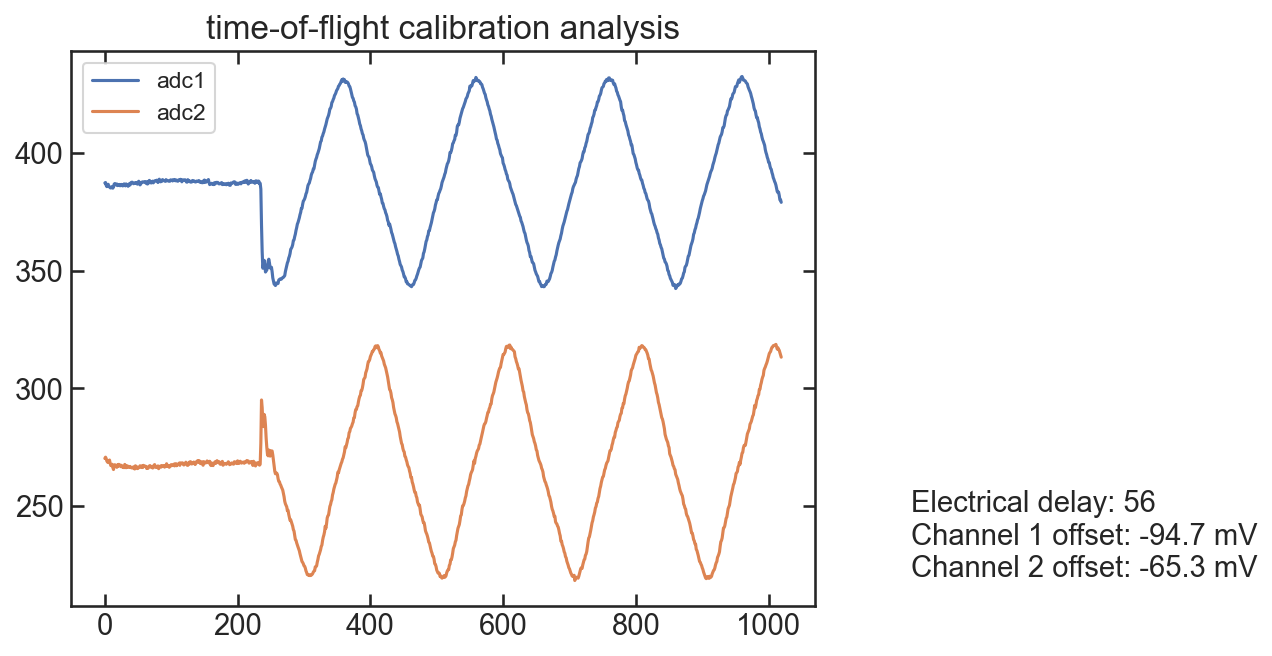

In [5]:
adc1,adc2 = qb.tof_cal(update_tof=True)
pf.tof_plot(adc1, adc2,delay=qb.pars['tof'],offsets=qb.pars['analog_input_offsets'])

2024-04-25 17:20:37,868 - qm - INFO     - Performing health check
2024-04-25 17:20:37,885 - qm - INFO     - Health check passed
2024-04-25 17:20:38,105 - qm - INFO     - Sending program to QOP for compilation
2024-04-25 17:20:38,161 - qm - INFO     - Executing program
Updating tof to 292
Input 1 Offset: -0.019172219669117627 mV
Input 2 Offset: 0.08327684589460763 mV
Updating analog_input_offsets to [-0.09472916164024205, -0.06538532834520527]


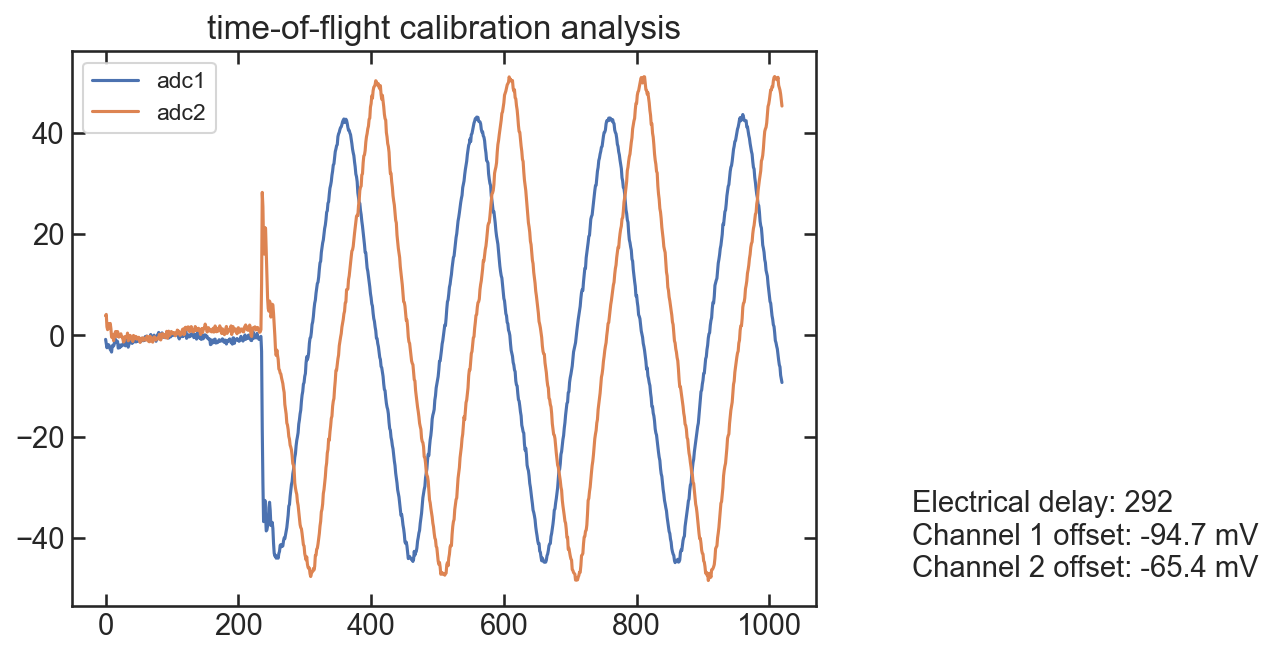

In [6]:
adc1,adc2 = qb.tof_cal(update_tof=True)
pf.tof_plot(adc1, adc2,delay=qb.pars['tof'],offsets=qb.pars['analog_input_offsets'])

**Note:** execute the following cell to visually see if the tof is calibrated

2024-04-25 17:20:41,358 - qm - INFO     - Performing health check
2024-04-25 17:20:41,370 - qm - INFO     - Health check passed
2024-04-25 17:20:41,521 - qm - INFO     - Sending program to QOP for compilation
2024-04-25 17:20:41,578 - qm - INFO     - Executing program
Input 1 Offset: -0.06291168811274508 mV
Input 2 Offset: 0.023262053844975355 mV
Updating analog_input_offsets to [-0.0946662499521293, -0.06540859039905025]


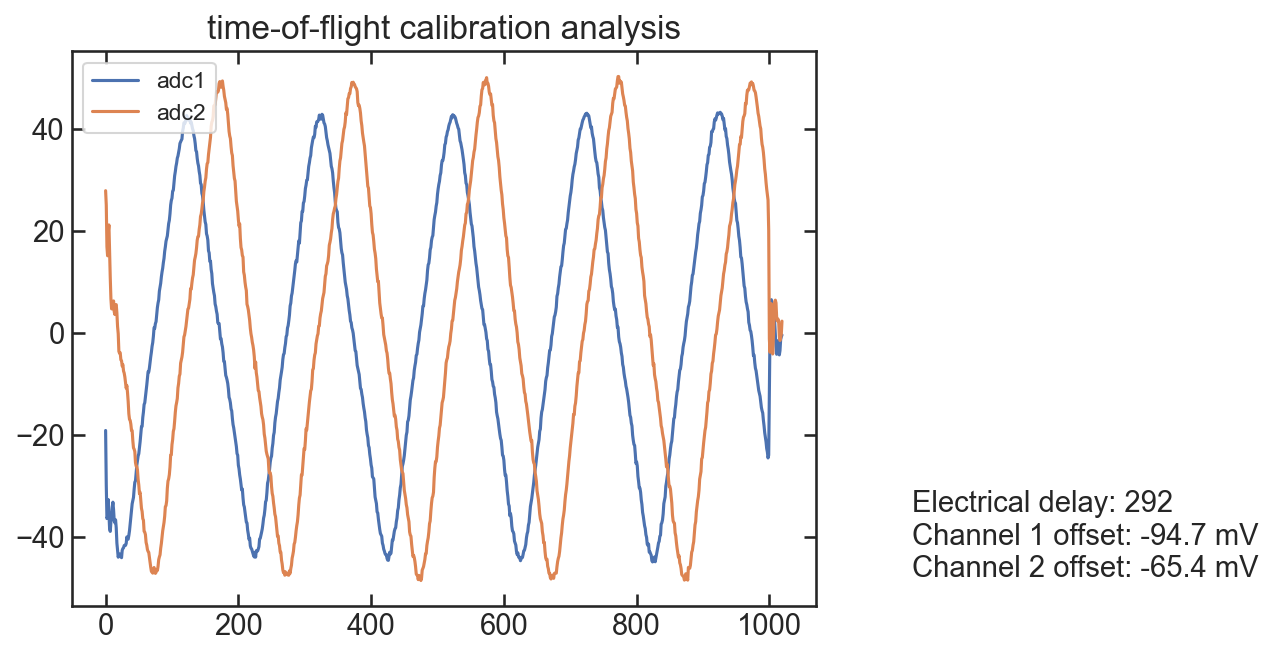

In [7]:
adc1,adc2 = qb.tof_cal(update_tof=False)
pf.tof_plot(adc1, adc2,delay=qb.pars['tof'],offsets=qb.pars['analog_input_offsets'])

# Optimize Mixers

Starting with the smallest resonator

In [8]:
LO_freq = 7.6e9 
rr_freq = 7.8366e9
qb.update_value('rr_LO',LO_freq)
qb.update_value('rr_freq',rr_freq)
qb.update_value('rr_IF',rr_freq-LO_freq)

Updating rr_LO to 7600000000.0
Setting readout_LO frequency to 7600000000.0.
Updating rr_freq to 7836600000.0
Updating rr_IF to 236600000.0


## Minimize LO leakage 

## Resonator

Updating readout_atten to 0
Setting DA attenuation to 0.
Setting sa frequency to 7600000000.0.
Setting sa span to 500000.0.
Setting sa threshold to -20.
Setting sa bandwidth to 1000.0.
LO at 7.6 GHz
Current I_offset = 0.0 mV, Current Q_offset = 0.0 mV
Setting sa frequency to 7600000000.0.
Setting sa span to 500000.0.
Setting sa threshold to -35.53170394897461.
Setting sa bandwidth to 1000.0.


100%|██████████| 121/121 [00:13<00:00,  9.11it/s]


Updating rr_mixer_offsets to [-0.00505, 0.0019500000000000003]
optimal I_offset = -5.0 mV, optimal Q_offset = 2.0 mV
Updating readout_atten to 0
Setting DA attenuation to 0.
Power: -74.93584442138672 dBm at 7.6 GHz


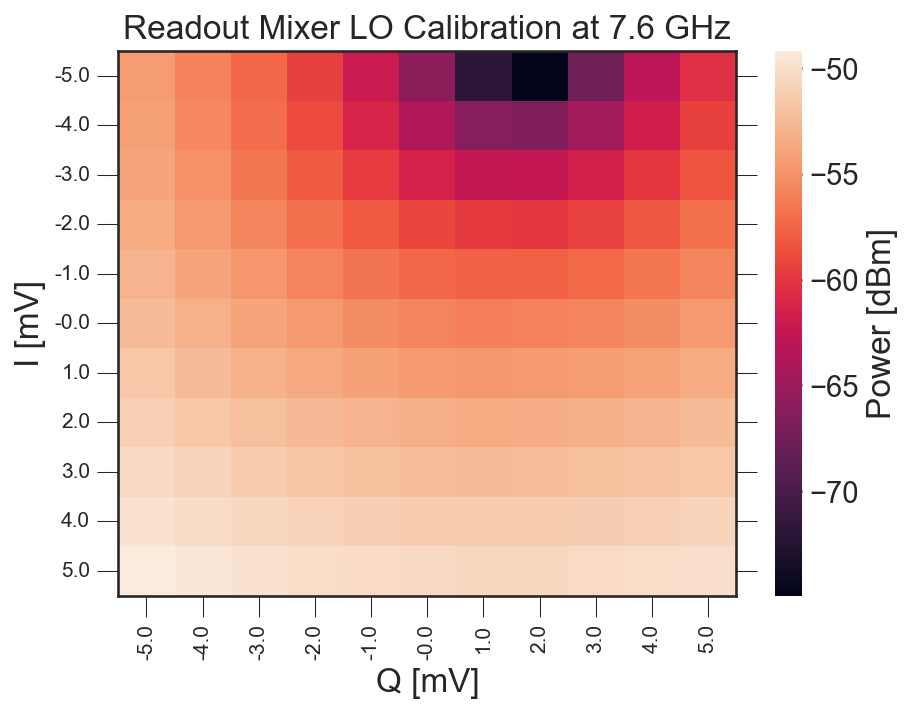

In [9]:
# qb.update_value('rr_LO',LO_freq)
#qb.update_value('rr_LO',qb.pars['rr_freq']-qb.pars['rr_IF'])
# qb.get_power(fc=qb.pars['rr_LO'],threshold=-20,span=1e6,config=True,plot=True)
qb.opt_lo_leakage(mode='coarse',element='rr',sa_span=0.5e6,threshold=-20,plot=True)

## Minimize image sideband

Updating rr_mixer_imbalance to [0.0, 0.0]
2024-04-25 17:21:01,930 - qm - INFO     - Sending program to QOP for compilation
2024-04-25 17:21:01,952 - qm - INFO     - Executing program
Updating readout_atten to 0
Setting DA attenuation to 0.
Setting sa frequency to 7363400000.0.
Setting sa span to 500000.0.
Setting sa threshold to -20.
Setting sa bandwidth to 1000.0.


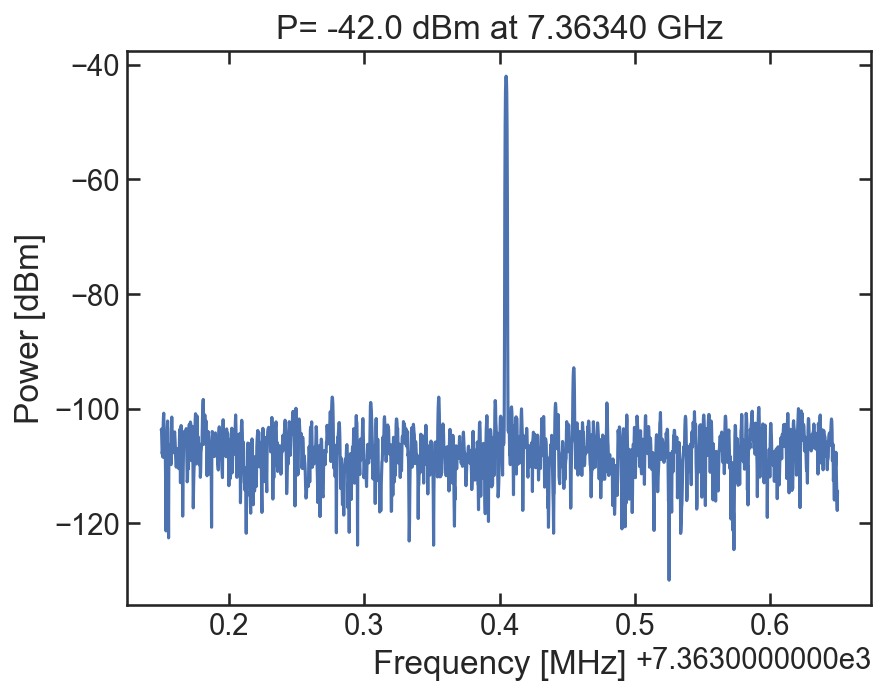

-41.986541748046875 dBm at 7.363404738559913 GHz
Sideband at 7.3634 GHz
Current gain = 0.0, Current phase = 0.0


100%|██████████| 100/100 [00:10<00:00,  9.52it/s]


Updating rr_mixer_imbalance to (0.011111111111111113, -0.25)
optimal gain = 0.0111, optimal phi = -0.25
Updating readout_atten to 0
Setting DA attenuation to 0.
Power: -47.614349365234375 dBm at 7.3634 GHz


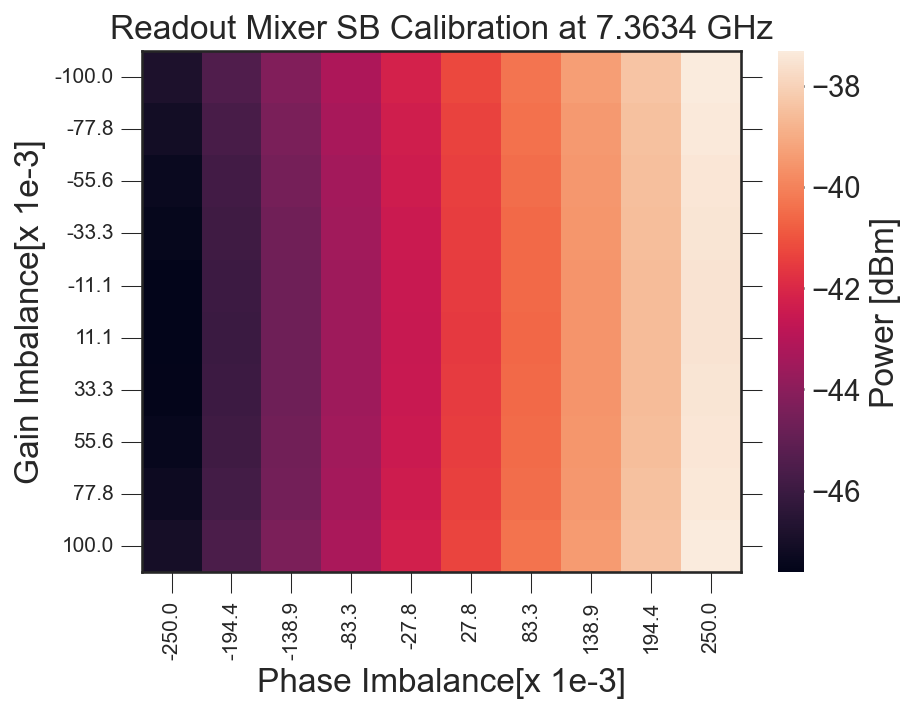

In [10]:
qb.update_value('rr_mixer_imbalance',[0.,0.])
qb.opt_sideband(mode='coarse',element='rr',sa_span=0.5e6,threshold=-20,plot=True)

2024-04-25 17:21:13,845 - qm - INFO     - Sending program to QOP for compilation
2024-04-25 17:21:13,869 - qm - INFO     - Executing program
Updating readout_atten to 0
Setting DA attenuation to 0.
Setting sa frequency to 7363400000.0.
Setting sa span to 500000.0.
Setting sa threshold to -50.
Setting sa bandwidth to 1000.0.


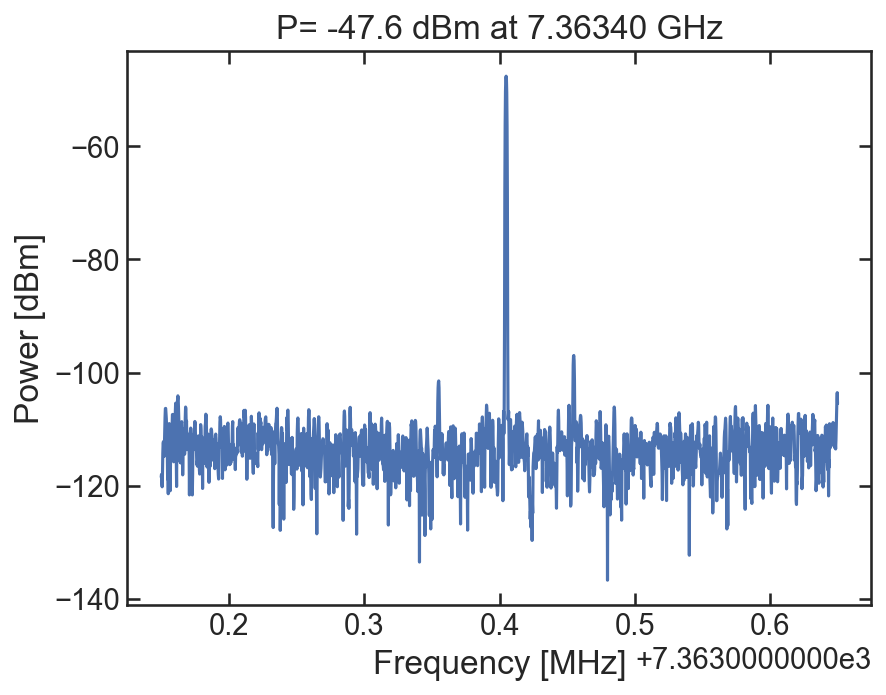

-47.6129264831543 dBm at 7.363404738559913 GHz
Sideband at 7.3634 GHz
Current gain = 0.0111, Current phase = -0.25


100%|██████████| 100/100 [00:10<00:00,  9.49it/s]


Updating rr_mixer_imbalance to (0.0, -0.4444444444444444)
optimal gain = 0.0, optimal phi = -0.4444
Updating readout_atten to 0
Setting DA attenuation to 0.
Power: -70.23519897460938 dBm at 7.3634 GHz


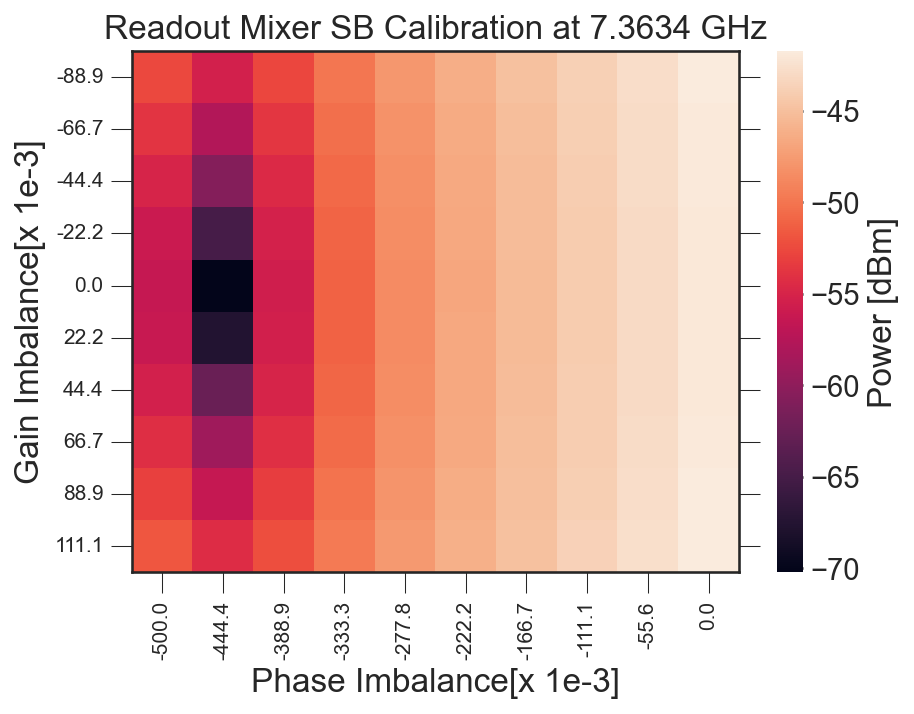

In [11]:
qb.opt_sideband(mode='coarse',element='rr',sa_span=0.5e6,threshold=-50,plot=True)

# Resonator spectroscopy

**Notes on resonator spectroscopy**

In [16]:
IF_min, IF_max = 232e6, 241e6
df_resonator_spec = 0.025e6

In [12]:
qb.update_value('readout_length', 5000) 
qb.pars  #ns (since resonator is narrow)

Updating readout_length to 5000


{'elements': ['qubit', 'rr'],
 'qubit_LO': 4480000000,
 'rr_LO': 7600000000.0,
 'readout_atten': 0,
 'host': None,
 'port': '9510',
 'Iout': {'qubit': 3, 'rr': 1},
 'Qout': {'qubit': 4, 'rr': 2},
 'Iin': 1,
 'Qin': 2,
 'AWG_trigger_out': 1,
 'controller': 'con1',
 'n_avg': 1000,
 'rr_IF': 236600000.0,
 'qubit_IF': 50000000.0,
 'gauss_len': 48,
 'gauss_amp': 0.45,
 'amp_r': 0.375,
 'readout_pulse_len_in_clk': 500,
 'saturation_duration': 2500,
 'readout_length': 5000,
 'qubit_freq': 4512900000,
 'rr_freq': 7836600000.0,
 'analog_input_offsets': [-0.0946662499521293, -0.06540859039905025],
 'analog_input_gain': 3,
 'rr_mixer_offsets': [-0.00505, 0.0019500000000000003],
 'qubit_mixer_offsets': [0, 0],
 'rr_mixer_imbalance': (0.0, -0.4444444444444444),
 'qubit_mixer_imbalance': [0, 0],
 'tof': 292,
 'smearing': 10,
 'IQ_rotation': 0.0,
 'switch_weights': False,
 'resettime': {'qubit': 25000, 'rr': 1250},
 'kappa': 200000.0,
 'readout_freq': 6200000000.0,
 'Q': 9000,
 'Qc': 9000,
 'operatio

In [13]:
qb.pars['resettime']['rr'] = 5000 # clock cycles
qb.write_pars()
qb.update_value('n_avg',1500)
qb.update_value('readout_atten',25)
qb.experiment = 'resonator_spec'

Updating n_avg to 1500
Updating readout_atten to 25
Setting DA attenuation to 25.


In [20]:

##added a 10db fixed attenuator on rr line after the spiltter and just before fridge input
data, job = qb.resonator_spec(
                       f_LO = qb.pars['rr_LO'],
                       IF_min = IF_min,
                       IF_max = IF_max,
                       df = df_resonator_spec,
                       fit=True,
                       on_off=False,
                       savedata=True,
                       showprogress=True)

Updating rr_LO to 7600000000.0
Setting readout_LO frequency to 7600000000.0.
2024-04-25 17:16:22,802 - qm - INFO     - Performing health check
2024-04-25 17:16:22,815 - qm - INFO     - Health check passed
2024-04-25 17:16:23,155 - qm - INFO     - Sending program to QOP for compilation
2024-04-25 17:16:23,364 - qm - INFO     - Executing program


100%|█████████▉| 1499/1500 [00:22<00:00, 68.07it/s]


Saving data to G:\Shared drives\Quasiparticles\OCS_QP\data\ocs2\resonator_spec\rr


Resonant Frequency: 7.83655 GHz
FWHM = 0.024999999999999998 MHz
kappa = 0.157 MHz


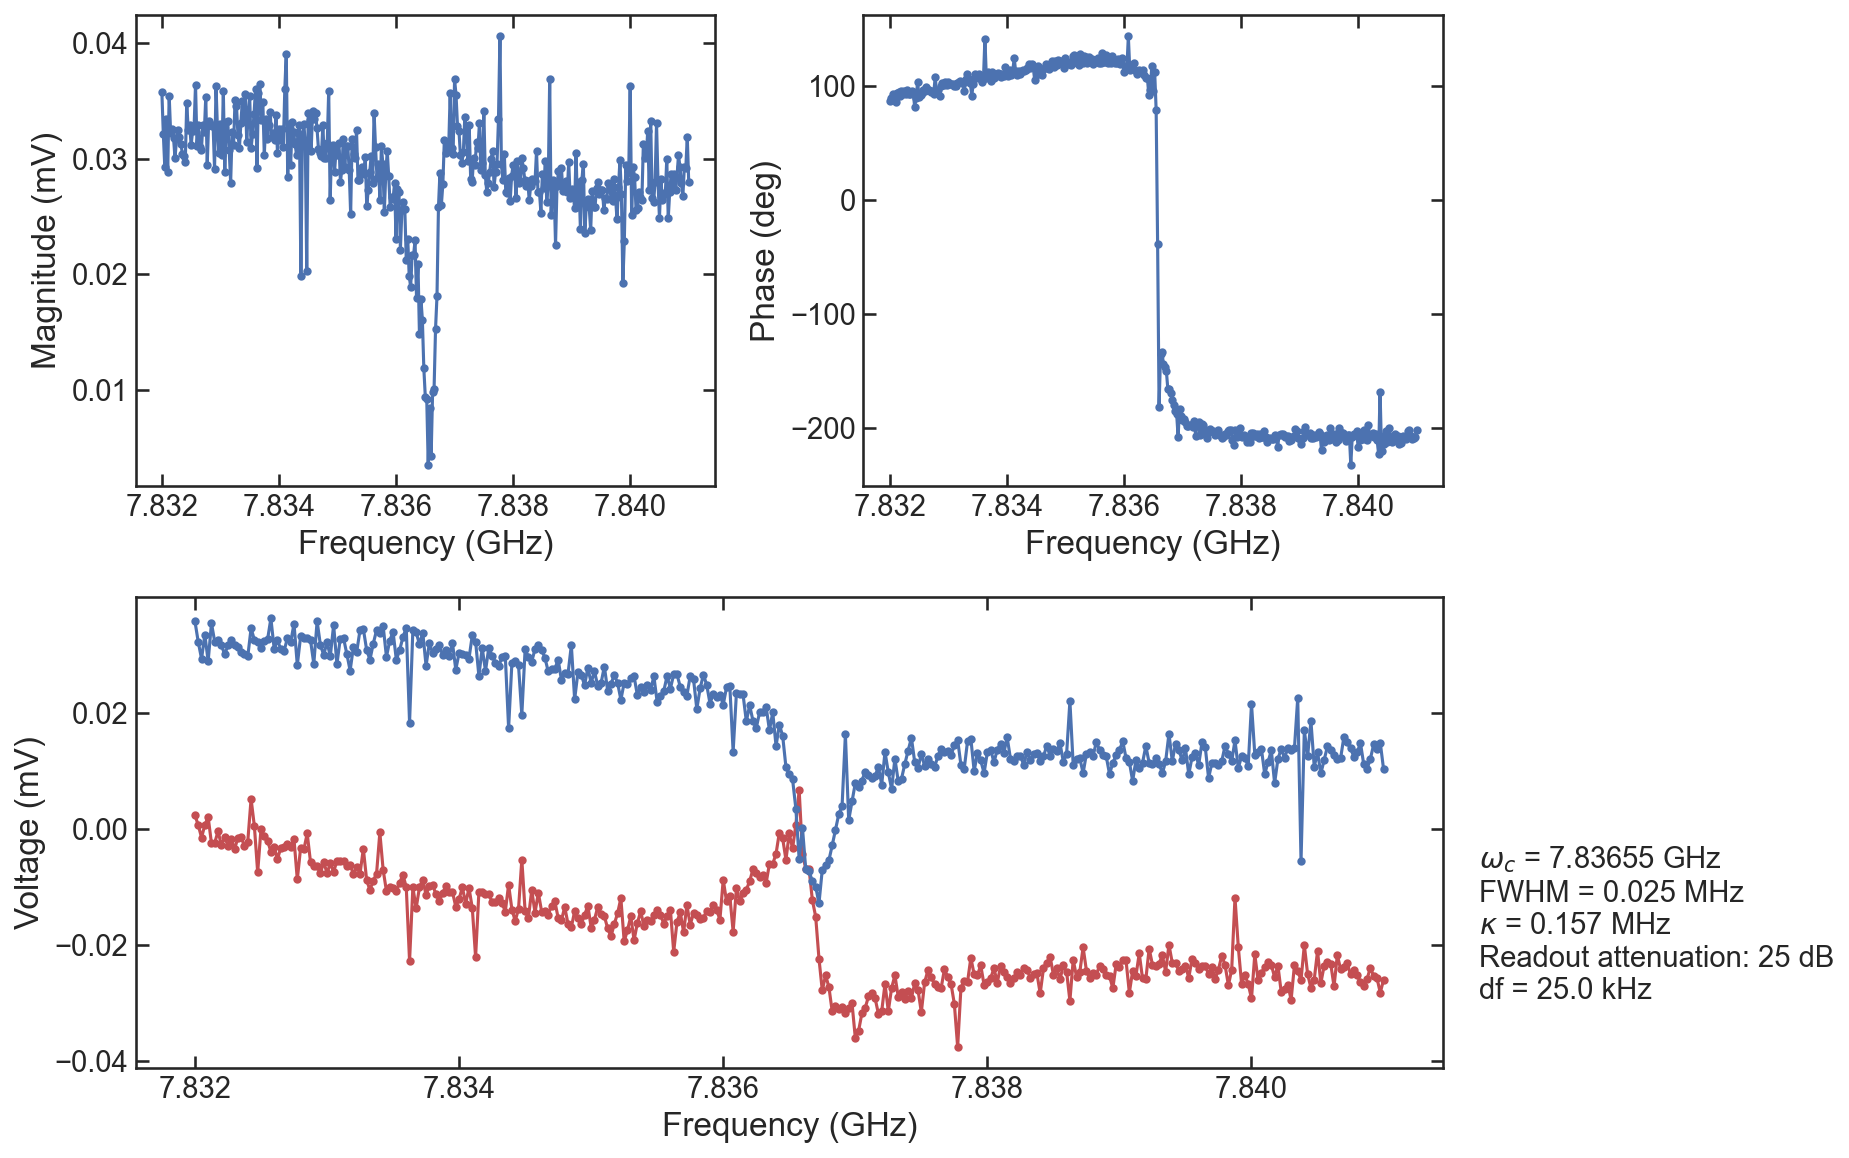

In [21]:
fc,fwhm = pf.fit_res(data['freqs'],data['I'],data['Q'])
pf.resonator_spec_plot(data,qb_pars=qb.pars,fwhm=fwhm,fc=fc)

In [ ]:
from resonator import Resonator

In [ ]:
res = Resonator(port_type='n',f_data=data['freqs'],z_data=data['I']+1j*data['Q'])
res.autofit(electric_delay=0)
res.show()

In [ ]:
print(res)

# Qubit Punchout

In [ ]:
IF_min, IF_max = 231e6, 241e6

In [ ]:
attenuations = np.arange(0,50,4)
qb.update_value('n_avg',3000)
data, job = qb.punchout(df = 0.05e6,
                 IF_min = IF_min,
                 IF_max = IF_max,
                 attenuations=attenuations,
                 savedata=False)

In [ ]:
pf.punchout_plot(data,xlabel='Frequency (GHz)',ylabel='Attenuation (dB)',cbar_label='Phase (deg)')

# Qubit Spectroscopy

The first time we run qubit spectroscopy we have to use a high qubit driving amplitude for a couple of reasons. 
1. Detect higher levels like $\omega_{02}/2$ and $\omega_{03}/3$ so you can calculate anharmonicity.
2. Since you don't know exactly what the qubit frequency is going to be (unless you've nailed the fab process), you will have to execute a broad sweep. Driving the qubit at high power broadens the resonance (decreases coherence), makes it easier to detect $\omega_{01}$ -> frequency spacing can be larger.

## Narrow search

In [14]:
qb.update_value('readout_atten',25)

Updating readout_atten to 25
Setting DA attenuation to 25.


In [15]:
#res.f0 
rr_freq = 7.8366e9
qb.update_value('rr_LO',LO_freq)
qb.update_value('rr_freq',rr_freq)
qb.update_value('rr_IF',rr_freq-LO_freq)

Updating rr_LO to 7600000000.0
Setting readout_LO frequency to 7600000000.0.
Updating rr_freq to 7836600000.0
Updating rr_IF to 236600000.0


In [ ]:
qb.update_value('qubit_LO',2.5e9)
qb.get_power(fc=qb.pars['qubit_LO'],threshold=-20,sa_span=1e6,config=True,plot=True)   

In [ ]:
pf.qubit_spec_plot(data,qb_pars=qb.pars,find_peaks=True, amp_q_scaling=amp_q_scaling)

## Run broad spectroscopy scan on qubit

In [16]:
#qb._instruments.set('sa','frequency',6e9)
qb.pars['resettime']['qubit'] = int(100e3)
qb.write_pars()
qb.pars

{'elements': ['qubit', 'rr'],
 'qubit_LO': 4480000000,
 'rr_LO': 7600000000.0,
 'readout_atten': 25,
 'host': None,
 'port': '9510',
 'Iout': {'qubit': 3, 'rr': 1},
 'Qout': {'qubit': 4, 'rr': 2},
 'Iin': 1,
 'Qin': 2,
 'AWG_trigger_out': 1,
 'controller': 'con1',
 'n_avg': 1500,
 'rr_IF': 236600000.0,
 'qubit_IF': 50000000.0,
 'gauss_len': 48,
 'gauss_amp': 0.45,
 'amp_r': 0.375,
 'readout_pulse_len_in_clk': 500,
 'saturation_duration': 2500,
 'readout_length': 5000,
 'qubit_freq': 4512900000,
 'rr_freq': 7836600000.0,
 'analog_input_offsets': [-0.0946662499521293, -0.06540859039905025],
 'analog_input_gain': 3,
 'rr_mixer_offsets': [-0.00505, 0.0019500000000000003],
 'qubit_mixer_offsets': [0, 0],
 'rr_mixer_imbalance': (0.0, -0.4444444444444444),
 'qubit_mixer_imbalance': [0, 0],
 'tof': 292,
 'smearing': 10,
 'IQ_rotation': 0.0,
 'switch_weights': False,
 'resettime': {'qubit': 100000, 'rr': 5000},
 'kappa': 200000.0,
 'readout_freq': 6200000000.0,
 'Q': 9000,
 'Qc': 9000,
 'operat

In [35]:
qb.update_value('qubit_freq',3.6e9)
qb.update_value('qubit_LO',3.4e9)
qb.update_value('qubit_IF',3.6e9-3.4e9)

Updating qubit_freq to 3600000000.0
Updating qubit_IF to 50000000.0
Updating qubit_LO to 3400000000.0
Setting qubit_LO frequency to 3400000000.0.
Updating qubit_IF to 200000000.0


Updating n_avg to 3500


  0%|          | 0/4 [00:00<?, ?it/s]

Updating qubit_LO to 2500000000.0
Setting qubit_LO frequency to 2500000000.0.
2024-04-25 17:25:50,257 - qm - INFO     - Performing health check
2024-04-25 17:25:50,271 - qm - INFO     - Health check passed
2024-04-25 17:25:50,755 - qm - INFO     - Sending program to QOP for compilation
2024-04-25 17:25:50,977 - qm - INFO     - Executing program


100%|█████████▉| 3499/3500 [20:37<00:00,  2.83it/s]


Peak threshold at 0.00454115190361672


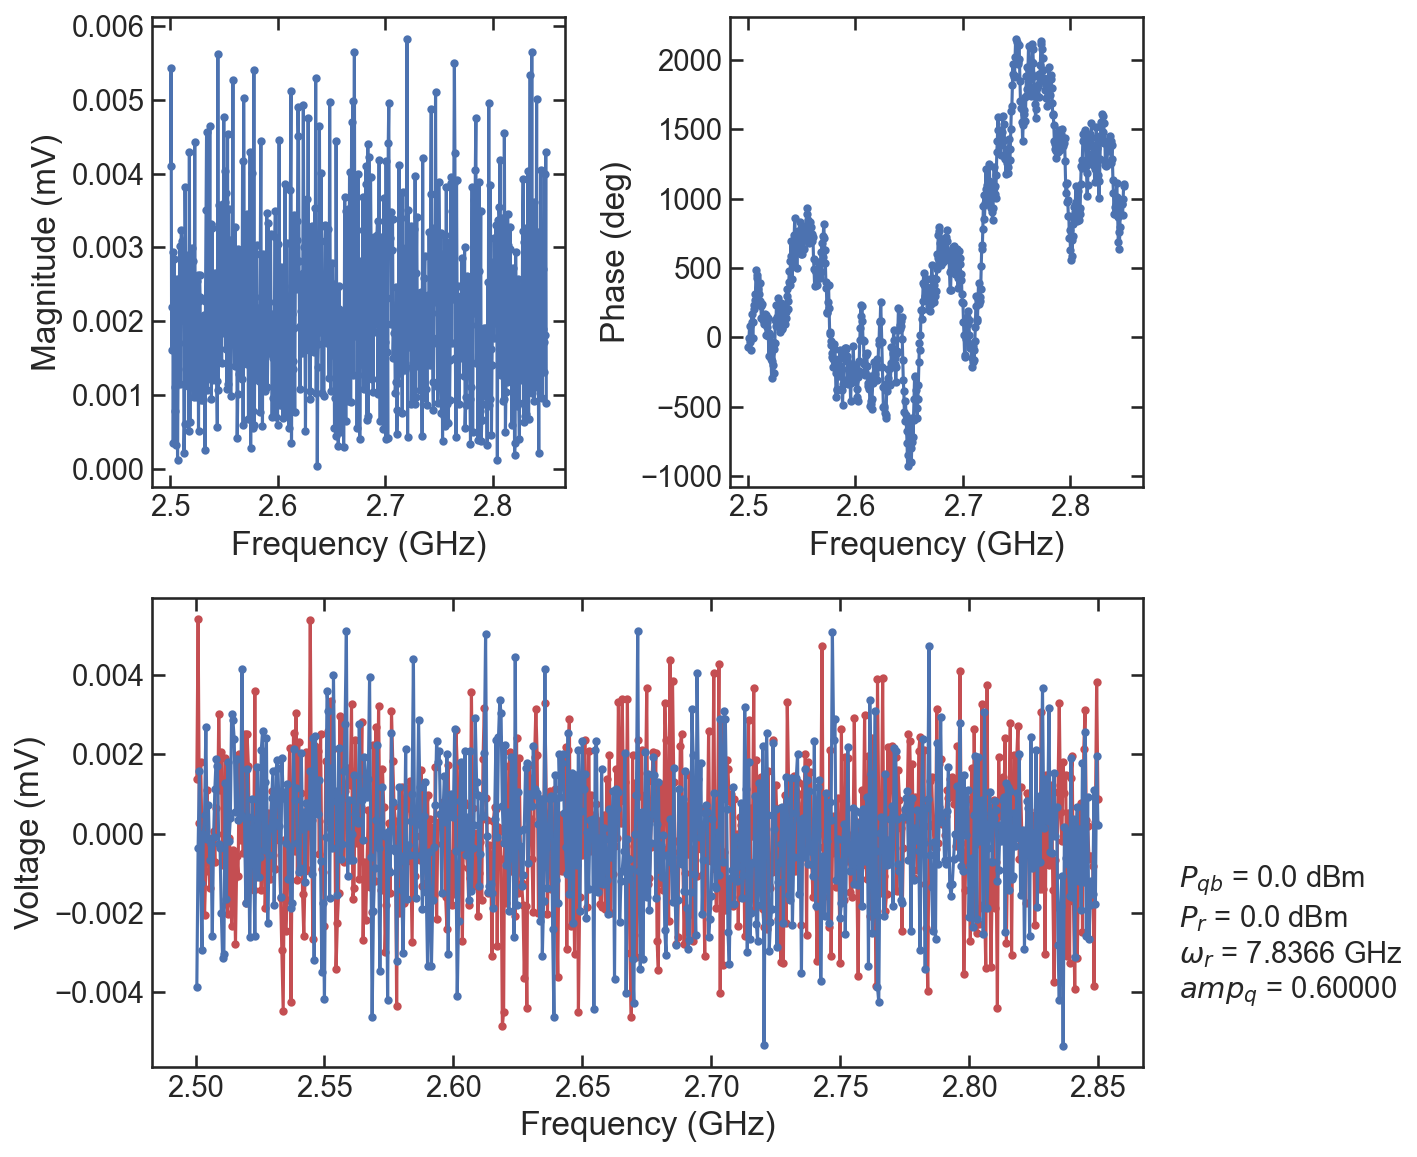

 25%|██▌       | 1/4 [20:39<1:01:58, 1239.43s/it]

Updating qubit_LO to 2850000000.0
Setting qubit_LO frequency to 2850000000.0.
2024-04-25 17:46:29,652 - qm - INFO     - Performing health check
2024-04-25 17:46:29,663 - qm - INFO     - Health check passed
2024-04-25 17:46:29,997 - qm - INFO     - Sending program to QOP for compilation
2024-04-25 17:46:30,236 - qm - INFO     - Executing program


100%|█████████▉| 3499/3500 [20:37<00:00,  2.83it/s]


Peak threshold at 0.004557613150276997


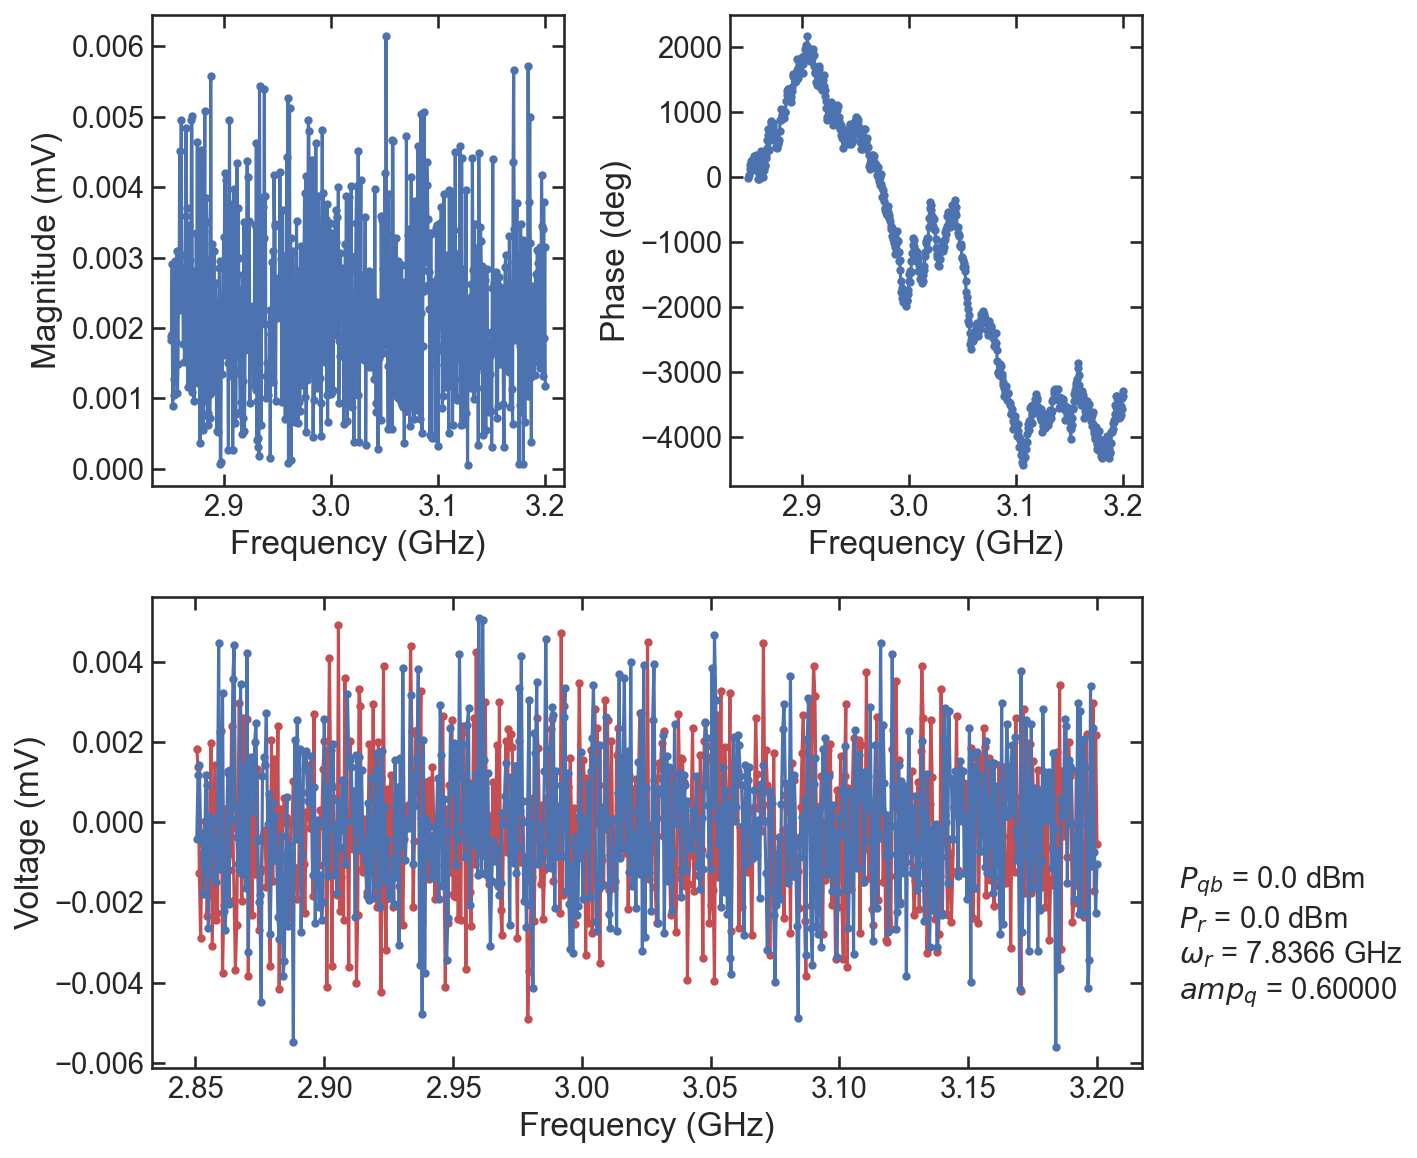

 50%|█████     | 2/4 [41:18<41:18, 1239.31s/it]  

Updating qubit_LO to 3200000000.0
Setting qubit_LO frequency to 3200000000.0.
2024-04-25 18:07:08,866 - qm - INFO     - Performing health check
2024-04-25 18:07:08,878 - qm - INFO     - Health check passed
2024-04-25 18:07:09,209 - qm - INFO     - Sending program to QOP for compilation
2024-04-25 18:07:09,433 - qm - INFO     - Executing program


100%|█████████▉| 3499/3500 [20:37<00:00,  2.83it/s]


Peak threshold at 0.004517830200334834


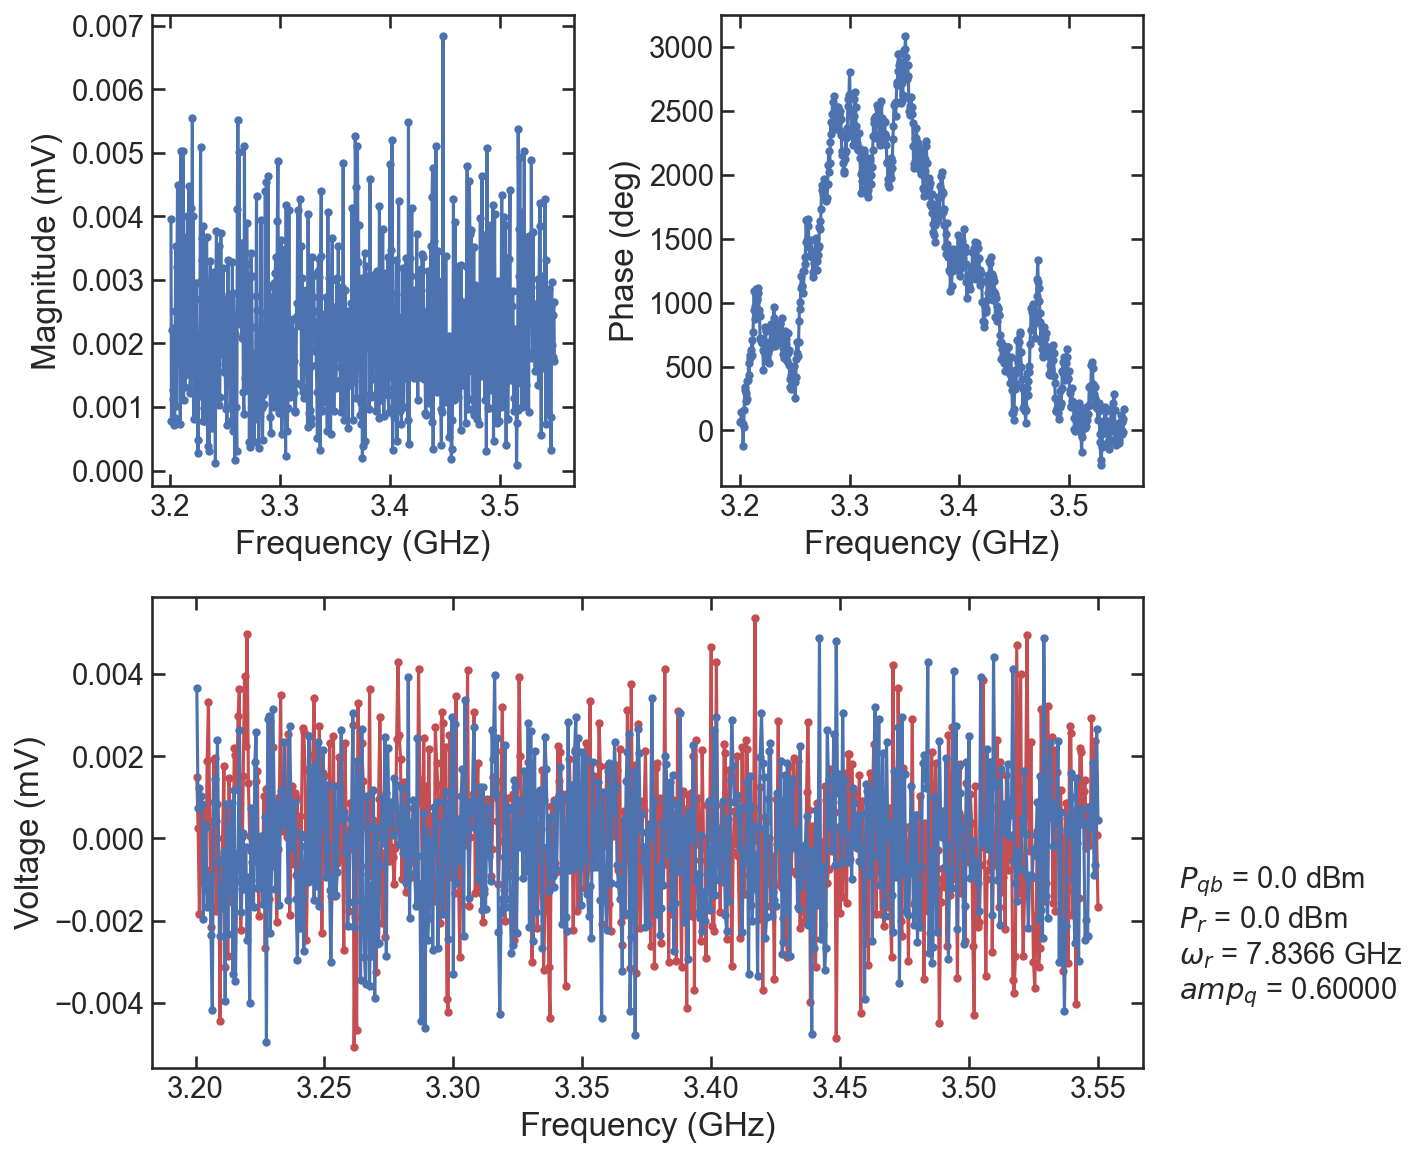

 75%|███████▌  | 3/4 [1:01:58<20:39, 1239.39s/it]

Updating qubit_LO to 3550000000.0
Setting qubit_LO frequency to 3550000000.0.
2024-04-25 18:27:48,353 - qm - INFO     - Performing health check
2024-04-25 18:27:48,364 - qm - INFO     - Health check passed
2024-04-25 18:27:48,711 - qm - INFO     - Sending program to QOP for compilation
2024-04-25 18:27:48,950 - qm - INFO     - Executing program


100%|█████████▉| 3499/3500 [20:37<00:00,  2.83it/s]


Peak threshold at 0.004685026674930965
Peaks at: 3.7825 GHz



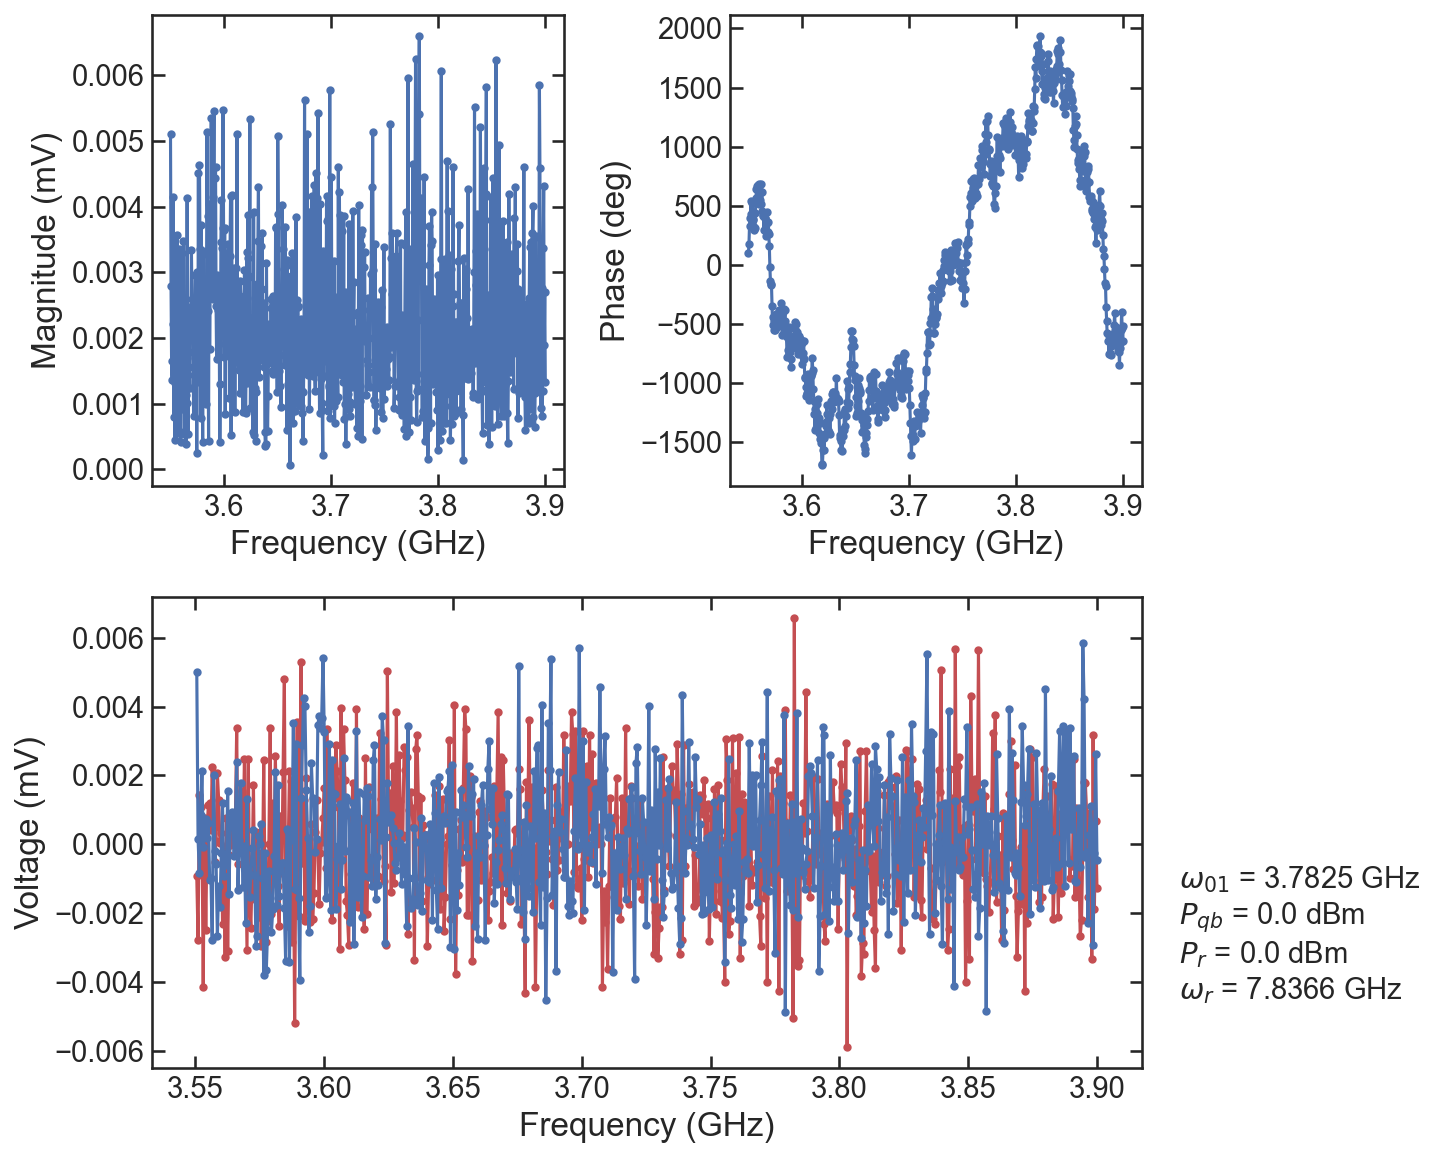

100%|██████████| 4/4 [1:22:37<00:00, 1239.43s/it]


Saving data to G:\Shared drives\Quasiparticles\OCS_QP\data\ocs2\qubit_spec\rr


In [20]:
qb.update_value('n_avg',3500)
qb.experiment = 'qubit_spec'
df_qubit_spec = 0.5e6
data, job = qb.run_scan(df = df_qubit_spec, element='qubit',
                                check_mixers=False,
                                chunksize = 150e6,
                                lo_min = 2.5e9,
                                lo_max = 3.8e9,
                                amp_q_scaling = 0.8,
                                on_off=True,
                                saturation_dur = 20e3,                   
                                showprogress=True,
                                savedata=True)

Peak threshold at 0.004576533845949866
Peaks at: 2.938 GHz

Peaks at: 3.7825 GHz



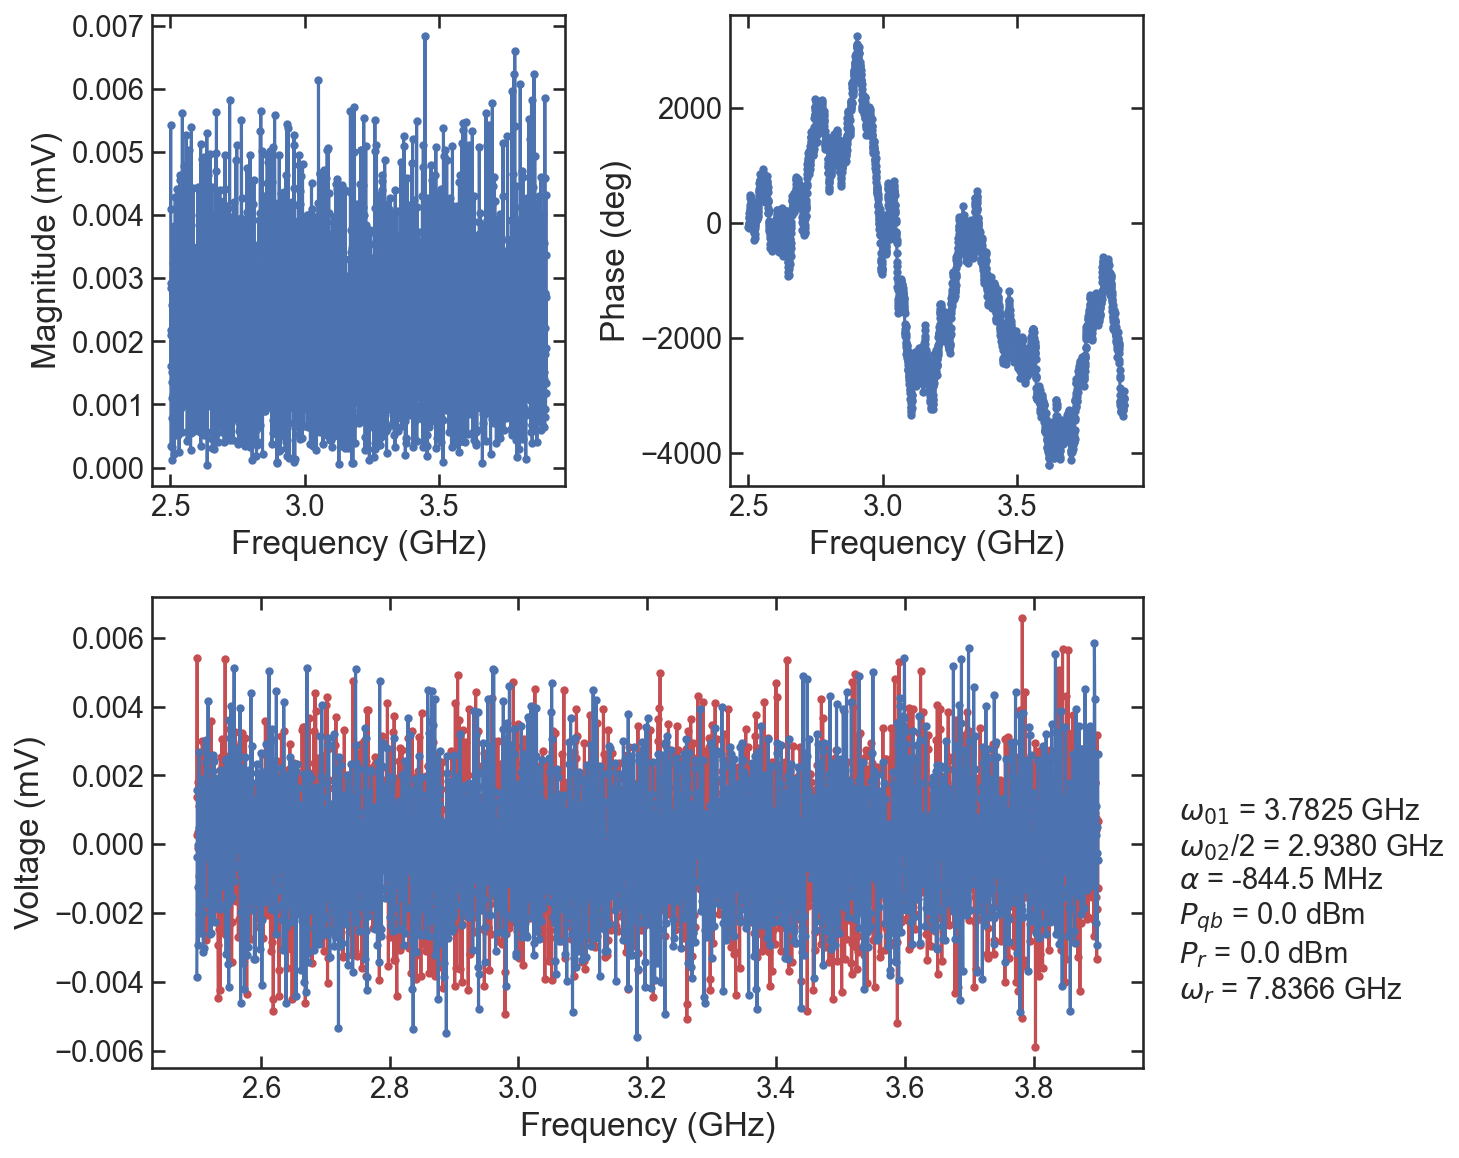

In [38]:
%matplotlib inline
pf.qubit_spec_plot(data,qb_pars=qb.pars,df=df_qubit_spec,rrFreq=qb.pars['rr_freq'],amp_q_scaling=1)

In [34]:
qb.get_power(fc=3.90e9,threshold=0,sa_span=1e6,config=True,plot=True)  

Setting sa frequency to 3900000000.0.
Setting sa span to 1000000.0.
Setting sa threshold to 0.
Setting sa bandwidth to 1000.0.
-91.15975189208984 dBm at 3.8998073517169116 GHz


-91.15975

Updating n_avg to 3500


  0%|          | 0/9 [00:00<?, ?it/s]

Updating qubit_LO to 2500000000.0
Setting qubit_LO frequency to 2500000000.0.
2024-04-25 19:11:17,853 - qm - INFO     - Performing health check
2024-04-25 19:11:17,865 - qm - INFO     - Health check passed
2024-04-25 19:11:18,212 - qm - INFO     - Sending program to QOP for compilation
2024-04-25 19:11:18,433 - qm - INFO     - Executing program


100%|█████████▉| 3499/3500 [08:50<00:00,  6.60it/s]


Peak threshold at 0.004308942191279915
Peaks at: 2.592 GHz



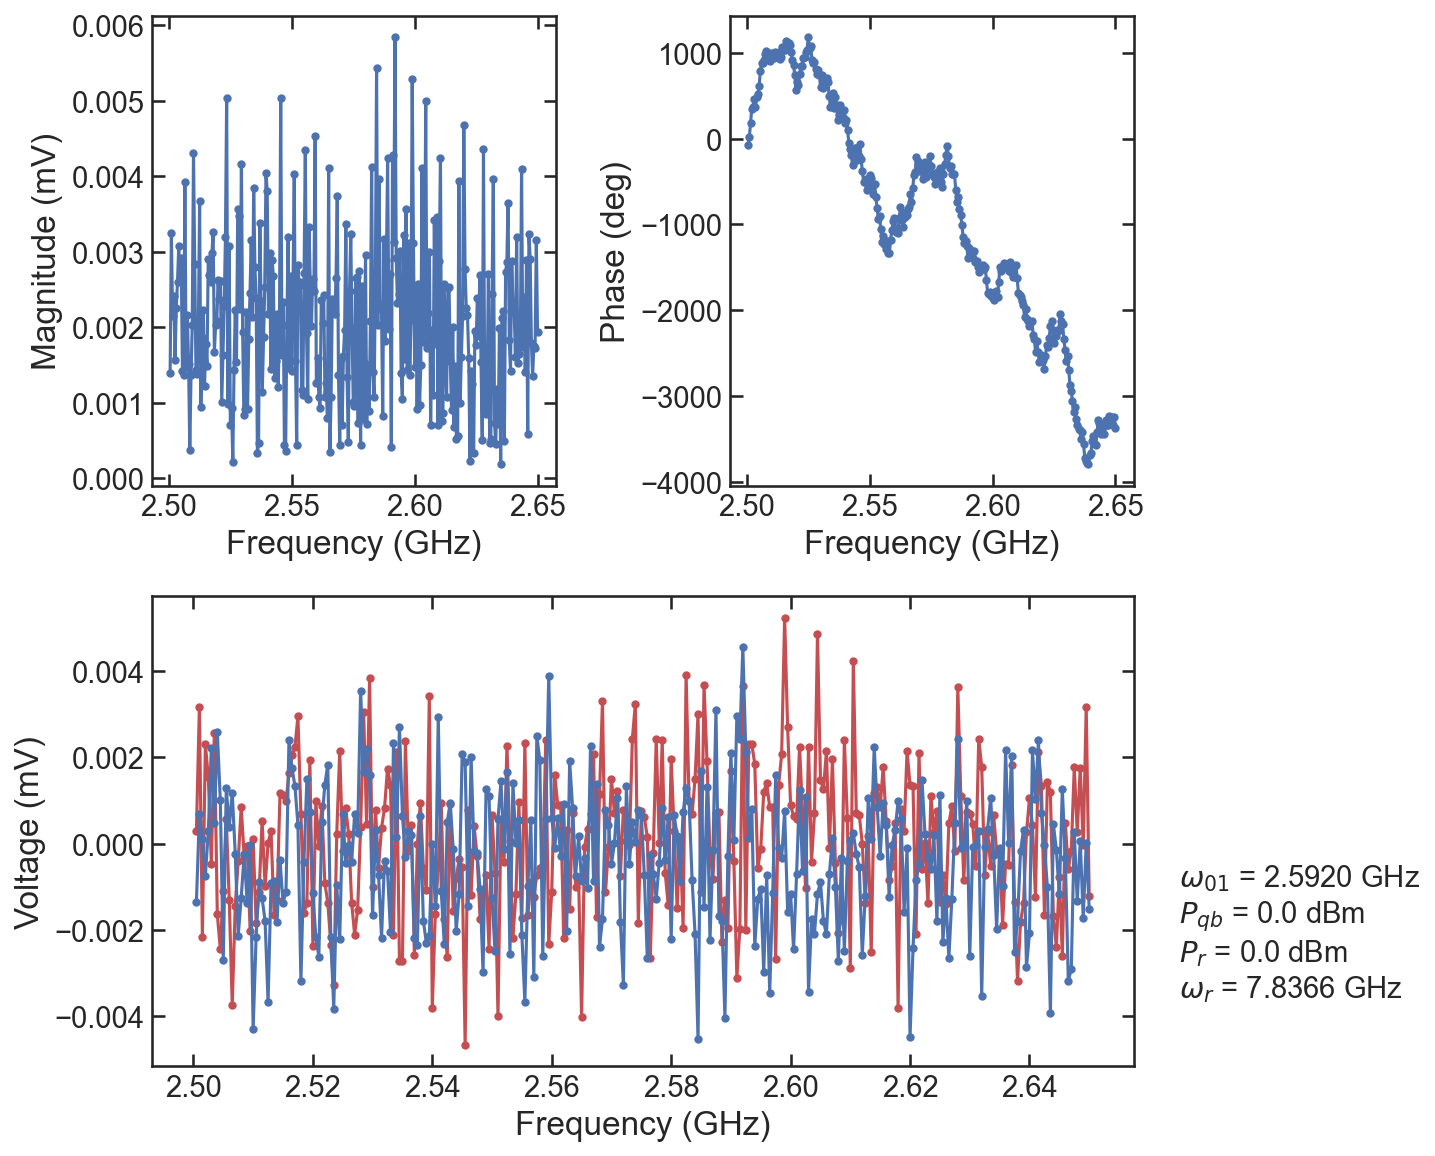

 11%|█         | 1/9 [08:52<1:10:56, 532.01s/it]

Updating qubit_LO to 2650000000.0
Setting qubit_LO frequency to 2650000000.0.
2024-04-25 19:20:09,817 - qm - INFO     - Performing health check
2024-04-25 19:20:09,828 - qm - INFO     - Health check passed
2024-04-25 19:20:10,159 - qm - INFO     - Sending program to QOP for compilation
2024-04-25 19:20:10,386 - qm - INFO     - Executing program


100%|█████████▉| 3499/3500 [08:50<00:00,  6.59it/s]


Peak threshold at 0.004755943091273642


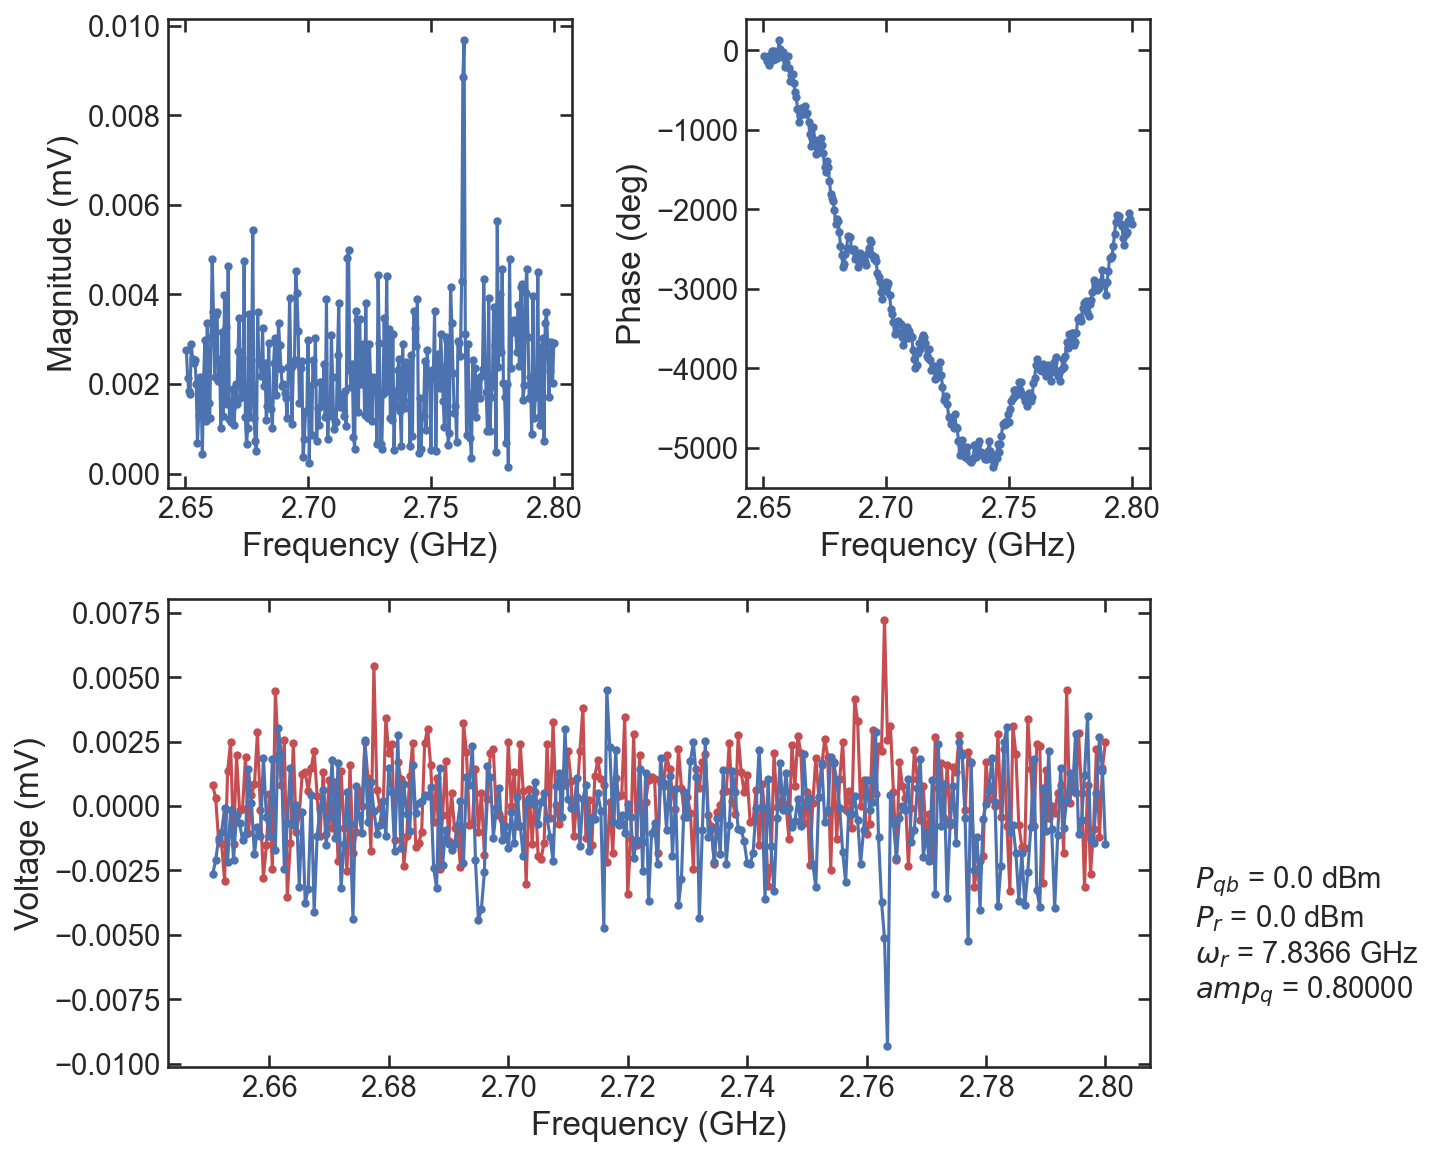

 22%|██▏       | 2/9 [17:43<1:02:03, 531.97s/it]

Updating qubit_LO to 2800000000.0
Setting qubit_LO frequency to 2800000000.0.
2024-04-25 19:29:01,783 - qm - INFO     - Performing health check
2024-04-25 19:29:01,794 - qm - INFO     - Health check passed
2024-04-25 19:29:02,154 - qm - INFO     - Sending program to QOP for compilation
2024-04-25 19:29:02,392 - qm - INFO     - Executing program


100%|█████████▉| 3499/3500 [08:50<00:00,  6.60it/s]


Peak threshold at 0.004443267111110457


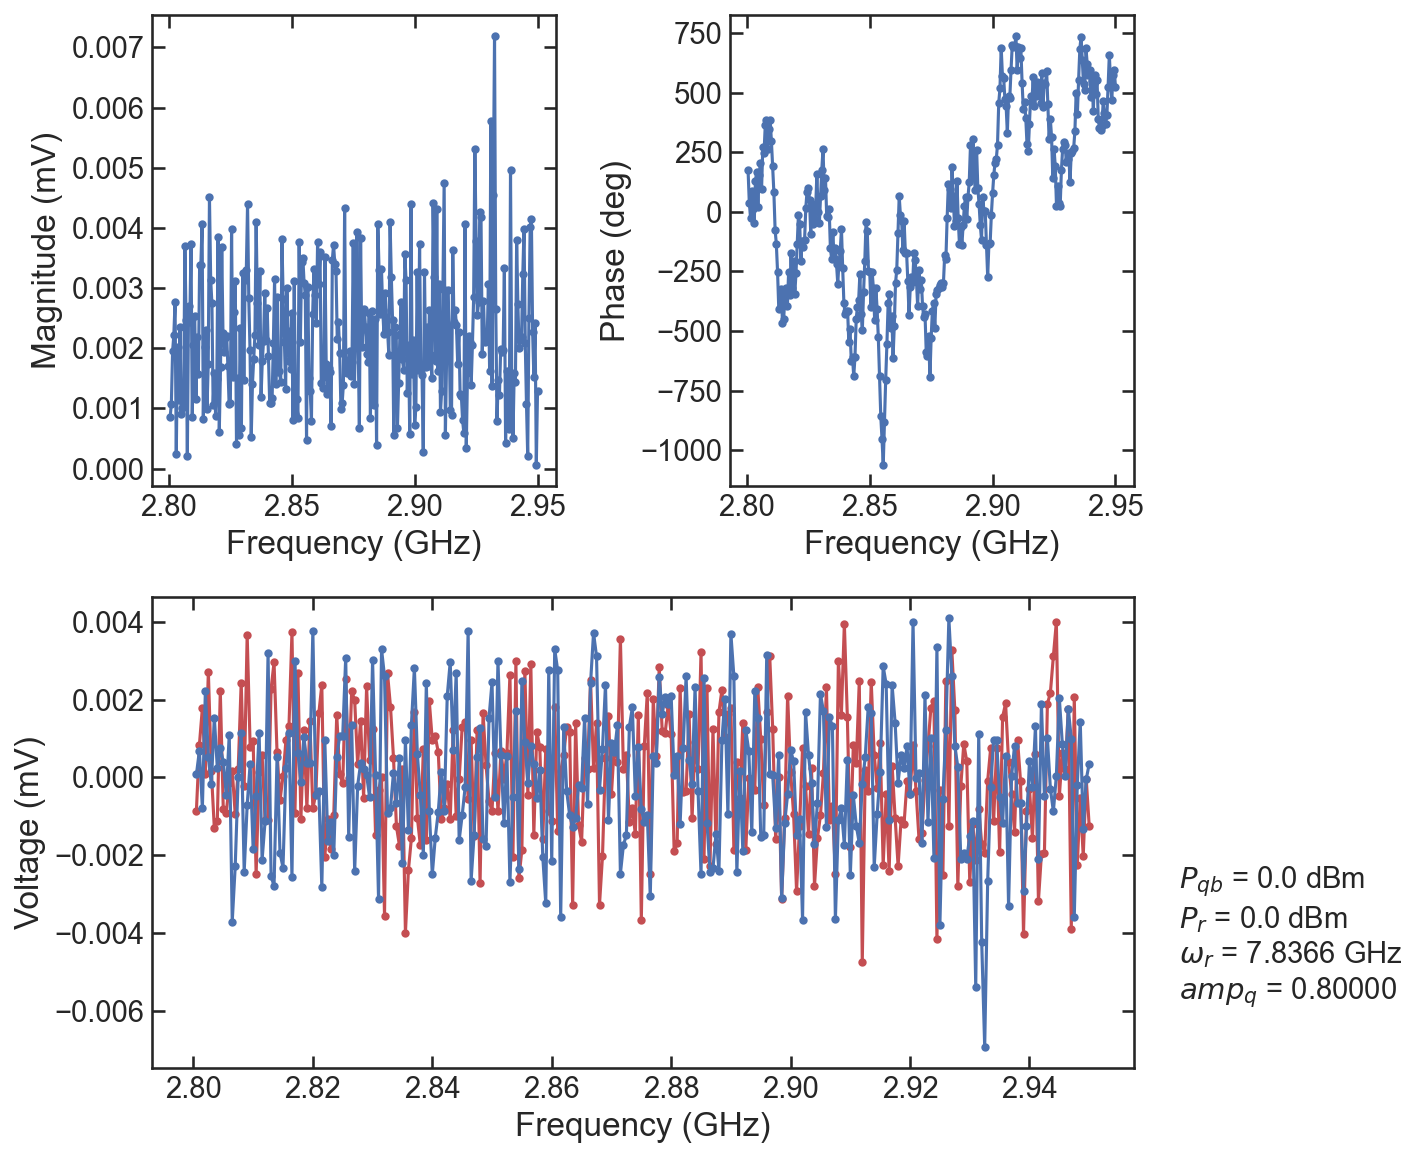

 33%|███▎      | 3/9 [26:36<53:12, 532.05s/it]  

Updating qubit_LO to 2950000000.0
Setting qubit_LO frequency to 2950000000.0.
2024-04-25 19:37:54,111 - qm - INFO     - Performing health check
2024-04-25 19:37:54,122 - qm - INFO     - Health check passed
2024-04-25 19:37:54,668 - qm - INFO     - Sending program to QOP for compilation
2024-04-25 19:37:54,888 - qm - INFO     - Executing program


100%|█████████▉| 3499/3500 [08:50<00:00,  6.60it/s]


Peak threshold at 0.004475055590305373
Peaks at: 3.0035 GHz



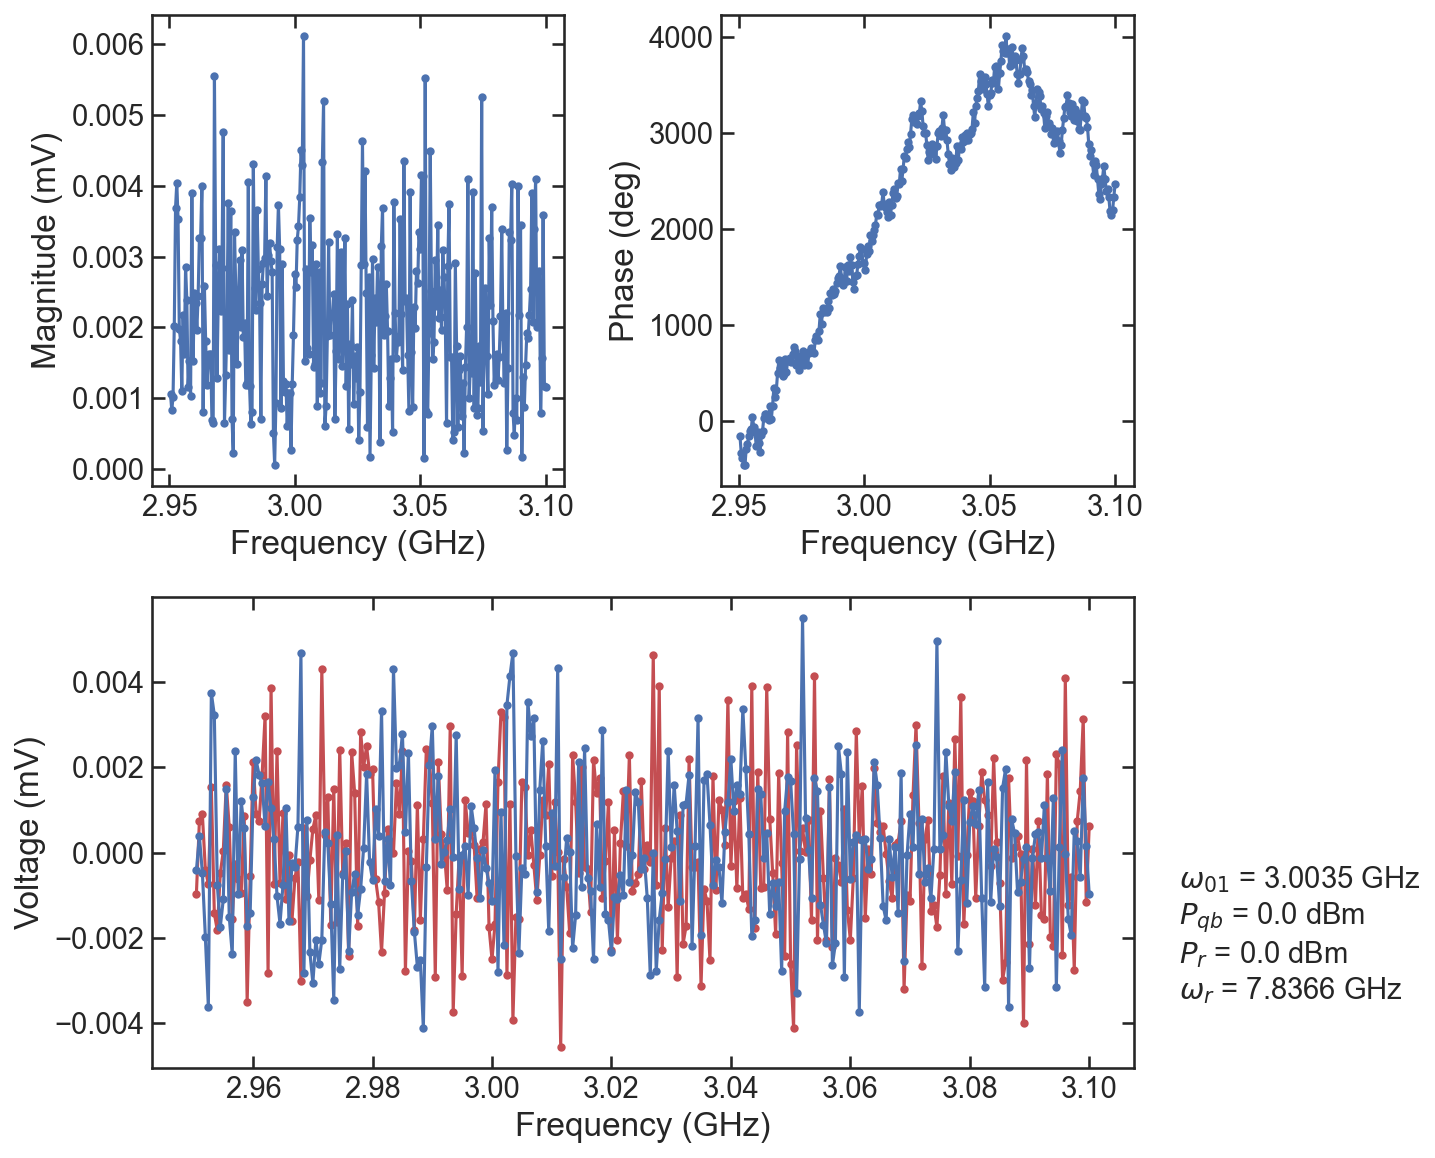

 44%|████▍     | 4/9 [35:28<44:20, 532.17s/it]

Updating qubit_LO to 3100000000.0
Setting qubit_LO frequency to 3100000000.0.
2024-04-25 19:46:46,286 - qm - INFO     - Performing health check
2024-04-25 19:46:46,298 - qm - INFO     - Health check passed
2024-04-25 19:46:46,660 - qm - INFO     - Sending program to QOP for compilation
2024-04-25 19:46:46,845 - qm - INFO     - Executing program


100%|█████████▉| 3499/3500 [08:50<00:00,  6.59it/s]


Peak threshold at 0.004713518609412546


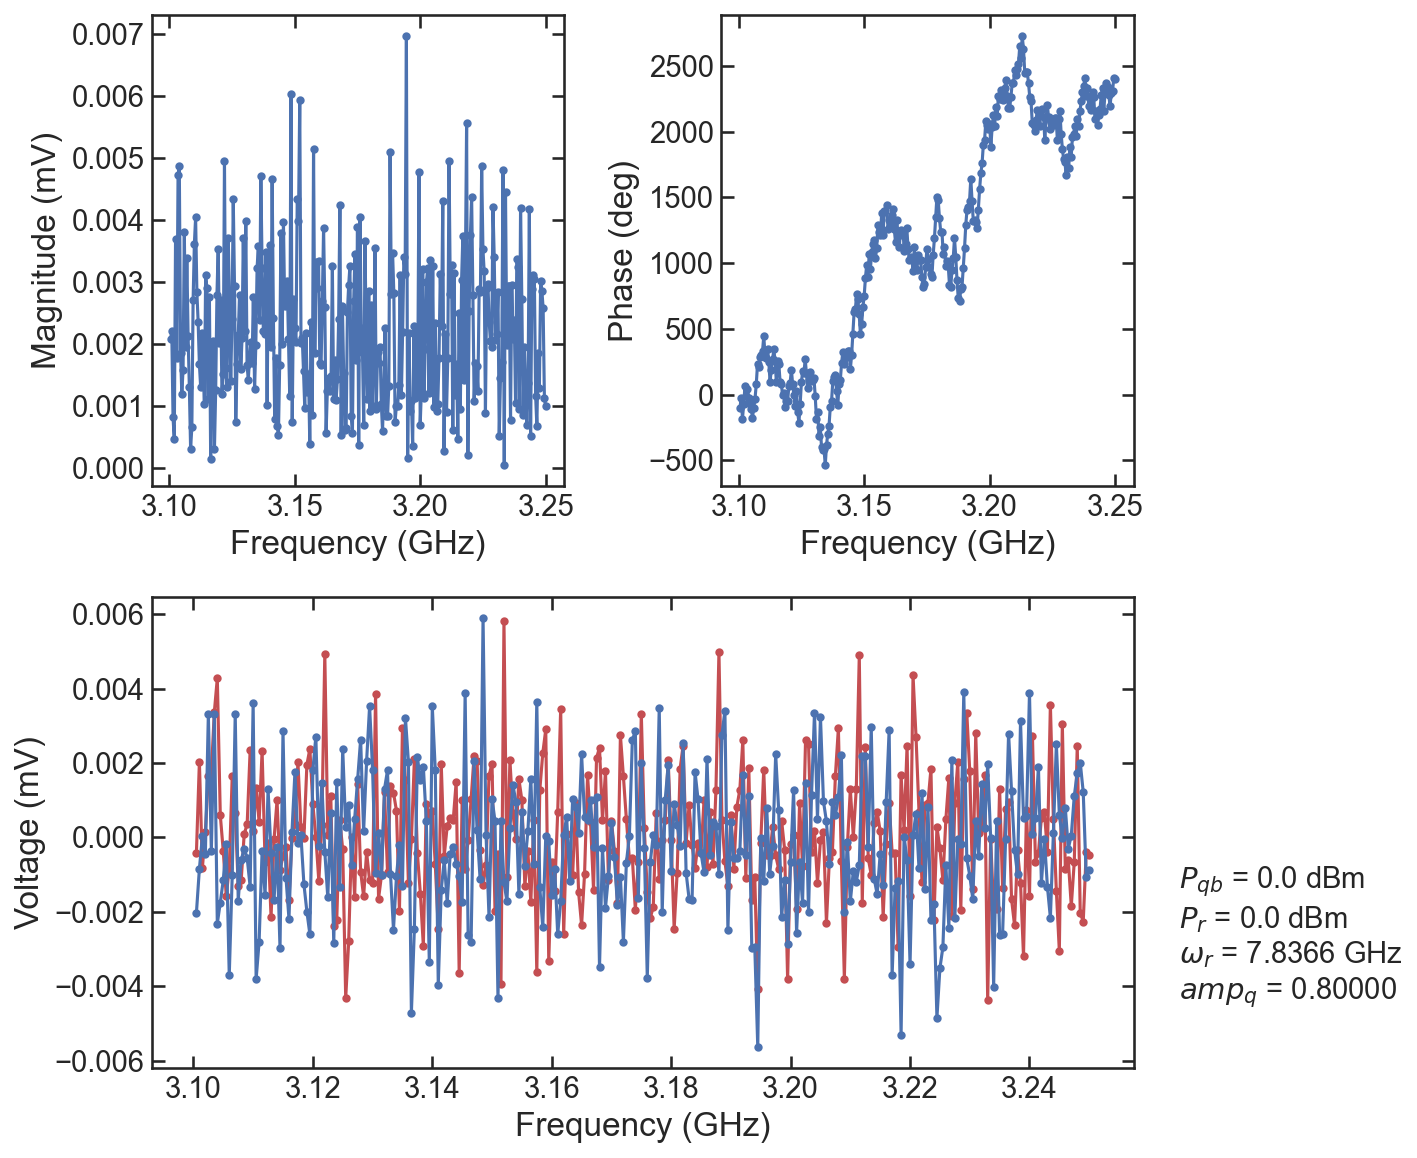

 56%|█████▌    | 5/9 [44:20<35:28, 532.20s/it]

Updating qubit_LO to 3250000000.0
Setting qubit_LO frequency to 3250000000.0.
2024-04-25 19:55:38,518 - qm - INFO     - Performing health check
2024-04-25 19:55:38,530 - qm - INFO     - Health check passed
2024-04-25 19:55:38,898 - qm - INFO     - Sending program to QOP for compilation
2024-04-25 19:55:39,116 - qm - INFO     - Executing program


 56%|█████▌    | 5/9 [46:12<36:58, 554.59s/it]


KeyboardInterrupt: 

In [39]:
qb.update_value('n_avg',3500)
qb.experiment = 'qubit_spec'
df_qubit_spec = 0.5e6
data, job = qb.run_scan(df = df_qubit_spec, element='qubit',
                                check_mixers=False,
                                chunksize = 150e6,
                                lo_min = 2.5e9,
                                lo_max = 3.8e9,
                                amp_q_scaling = 0.8,
                                on_off=True,
                                saturation_dur = 20e3,                   
                                showprogress=True,
                                savedata=True)

There seems to be a qubit around 2.93 GHz. Lets zoom in, increase span and decrease power a bit around there. So we are doing a fine sweep.

In [45]:
qb.pars

{'elements': ['qubit', 'rr'],
 'qubit_LO': 2700000000.0,
 'rr_LO': 7600000000.0,
 'readout_atten': 25,
 'host': None,
 'port': '9510',
 'Iout': {'qubit': 3, 'rr': 1},
 'Qout': {'qubit': 4, 'rr': 2},
 'Iin': 1,
 'Qin': 2,
 'AWG_trigger_out': 1,
 'controller': 'con1',
 'n_avg': 20,
 'rr_IF': 236600000.0,
 'qubit_IF': 200000000.0,
 'gauss_len': 48,
 'gauss_amp': 0.45,
 'amp_r': 0.375,
 'readout_pulse_len_in_clk': 500,
 'saturation_duration': 2500,
 'readout_length': 4000,
 'qubit_freq': 3600000000.0,
 'rr_freq': 7836600000.0,
 'analog_input_offsets': [-0.0946662499521293, -0.06540859039905025],
 'analog_input_gain': 3,
 'rr_mixer_offsets': [-0.00505, 0.0019500000000000003],
 'qubit_mixer_offsets': [0, 0],
 'rr_mixer_imbalance': (0.0, -0.4444444444444444),
 'qubit_mixer_imbalance': [0, 0],
 'tof': 292,
 'smearing': 10,
 'IQ_rotation': 0.0,
 'switch_weights': False,
 'resettime': {'qubit': 100000, 'rr': 5000},
 'kappa': 200000.0,
 'readout_freq': 6200000000.0,
 'Q': 9000,
 'Qc': 9000,
 'ope

In [51]:

qb.update_value('readout_length', 4000)   
qb.update_value('n_avg',4000)

data, job = qb.qubit_spec(element='qubit',
                                check_mixers=False,
                                IF_min=190e6,
                                IF_max=270e6,
                                f_LO=2.7e9,
                                df=0.25e6,
                                on_off=True,
                                amp_q_scaling = 0.6,
                                saturation_dur = 20e3,
                                showprogress=True,
                                savedata=True,
                                )

Updating readout_length to 4000
Updating n_avg to 4000
Updating qubit_LO to 2700000000.0
Setting qubit_LO frequency to 2700000000.0.
2024-04-25 20:19:41,651 - qm - INFO     - Performing health check
2024-04-25 20:19:41,679 - qm - INFO     - Health check passed
2024-04-25 20:19:42,268 - qm - INFO     - Sending program to QOP for compilation
2024-04-25 20:19:42,494 - qm - INFO     - Executing program


100%|█████████▉| 3999/4000 [10:47<00:00,  6.18it/s]


Peak threshold at 0.010714331540091089


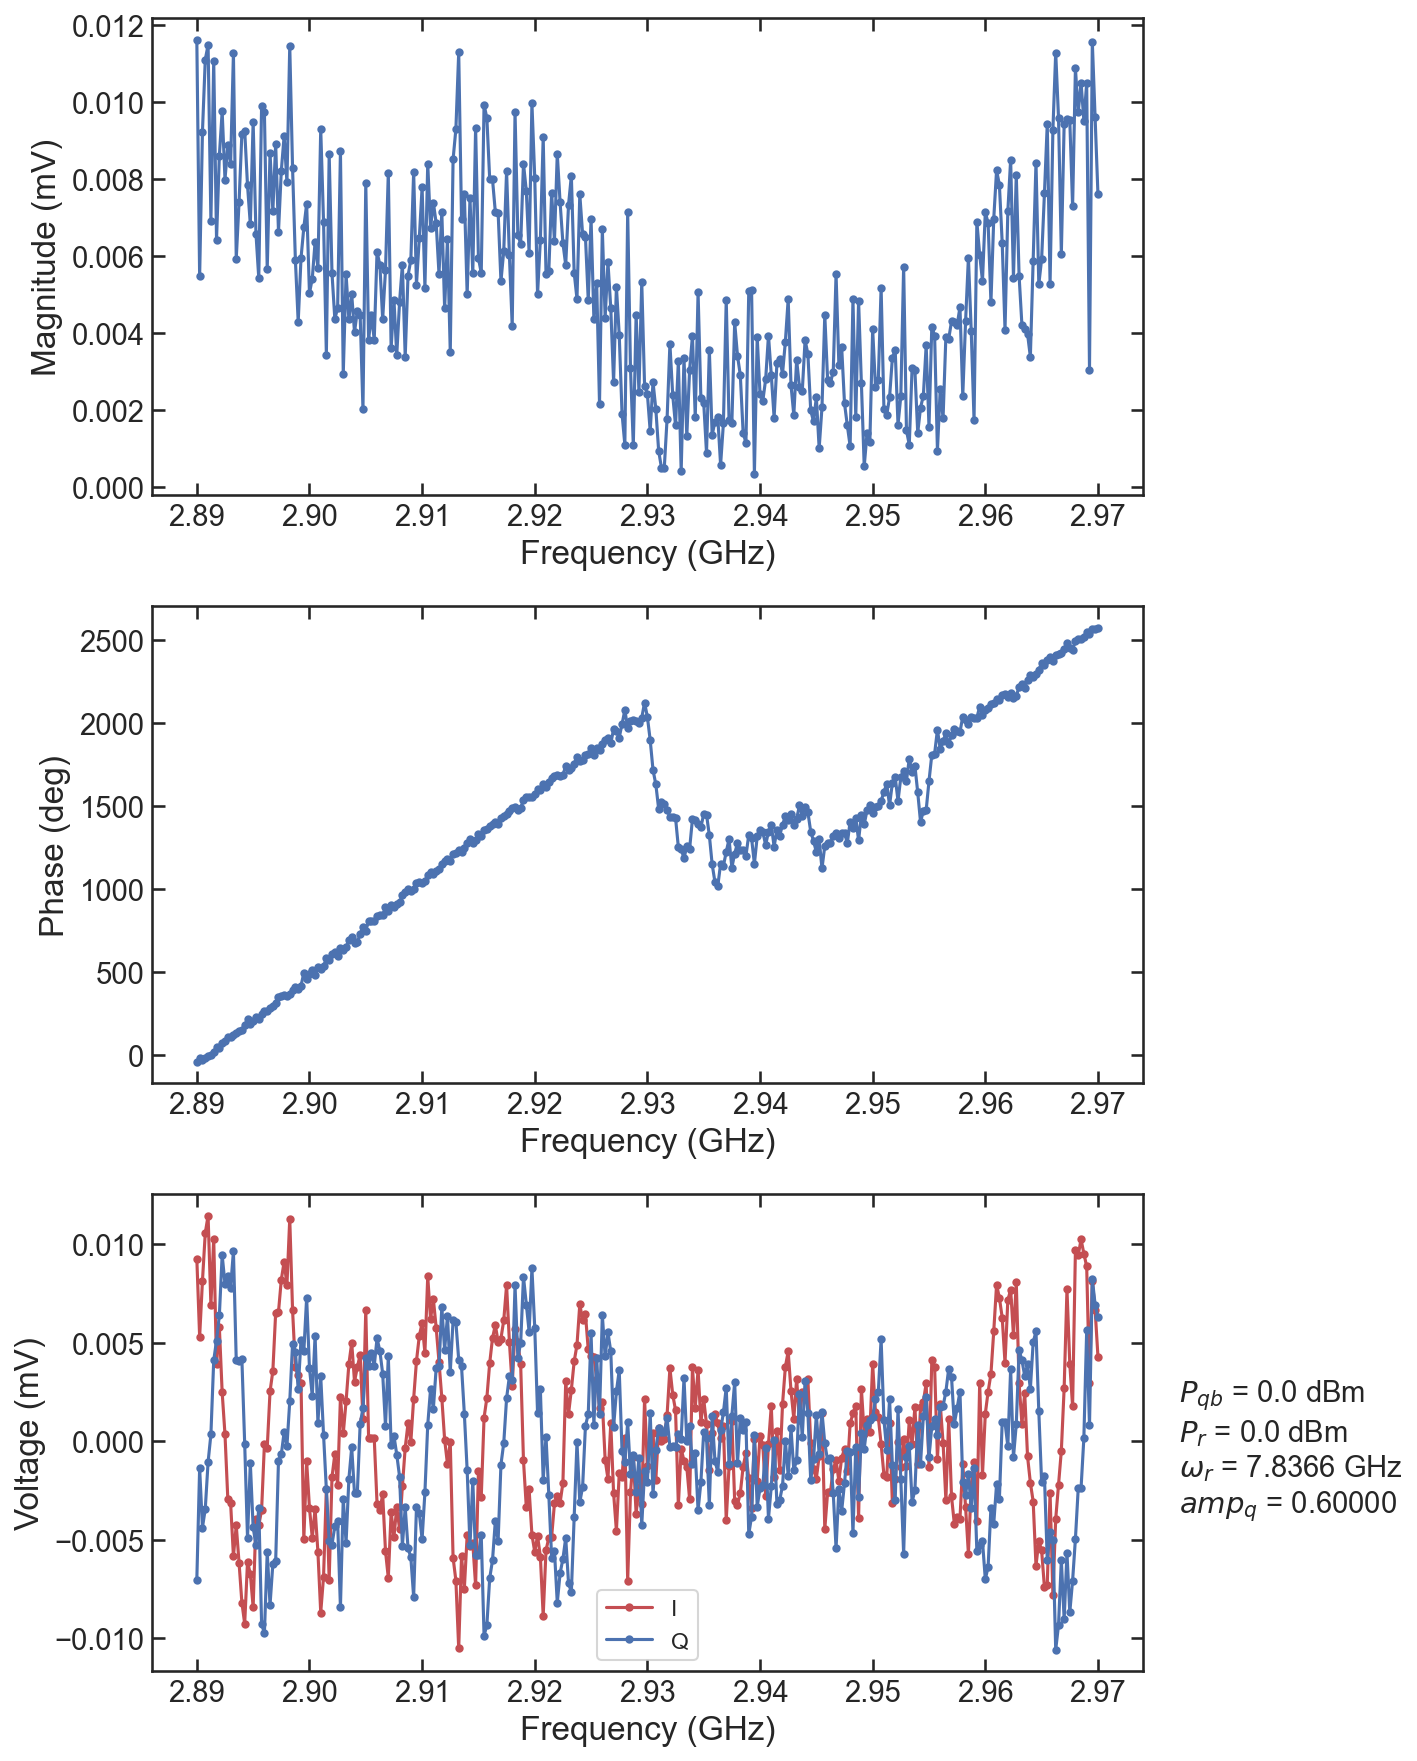

In [52]:
pf.qubit_spec_plot(data,qb_pars=qb.pars,find_peaks=True, amp_q_scaling=0.6)